# Name = Divyanshu_Singh

# Batch = DS2306

.

.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
# There are alot of null values present
# In Evaporation and Sunshine more than 45% of the data is absent so its better to drop them

In [6]:
df=df.drop(['Evaporation','Sunshine'],axis=1)

In [7]:
df=df.drop_duplicates()

In [8]:
df.dropna()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
4     2008-12-05   Albury     17.5     32.3       1.0           W   
11    2008-12-12   Albury     15.9     21.7       2.2         NNE   
12    2008-12-13   Albury     15.9     18.6      15.6           W   
16    2008-12-17   Albury     14.1     20.9       0.0         ENE   
17    2008-12-18   Albury     13.5     22.9      16.8           W   
...          ...      ...      ...      ...       ...         ...   
8385  2012-11-10   Darwin     24.9     34.3       0.0           N   
8393  2017-05-25    Uluru     14.6     26.3       0.0           S   
8397  2017-05-29    Uluru     12.7     22.2       0.0           E   
8398  2017-05-30    Uluru      9.4     22.7       0.0           E   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
4              41.0        ENE         NW           7.0  ...         82.0   
11             31.0         NE        ENE          15.0  ...         89.0   
12             61.0        NNW        NNW          28.0  ...         76.0   
16             22.0        SSW          E          11.0  ...         69.0   
17             63.0          N        WNW           6.0  ...         80.0   
...             ...        ...        ...           ...  ...          ...   
8385           39.0        ENE         NE          17.0  ...         63.0   
8393           37.0        SSW          S          19.0  ...         61.0   
8397           37.0          E        ESE          19.0  ...         59.0   
8398           35.0         SE          E          13.0  ...         62.0   
8423           28.0        SSE          N          13.0  ...         51.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
11           91.0       1010.5       1004.2       8.0       8.0     15.9   
12           93.0        994.3        993.0       8.0       8.0     17.4   
16           82.0       1012.2       1010.4       8.0       1.0     17.2   
17           65.0       1005.8       1002.2       8.0       1.0     18.0   
...           ...          ...          ...       ...       ...      ...   
8385         46.0       1012.1       1007.9       7.0       3.0     29.8   
8393         36.0       1022.0       1018.6       7.0       1.0     15.4   
8397         34.0       1024.3       1021.7       8.0       8.0     13.9   
8398         32.0       1026.6       1023.6       8.0       4.0     11.8   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   

      Temp3pm  RainToday RainTomorrow  
4        29.7         No           No  
11       17.0        Yes          Yes  
12       15.8        Yes          Yes  
16       18.1         No          Yes  
17       21.5        Yes          Yes  
...       ...        ...          ...  
8385     33.2         No           No  
8393     25.0         No           No  
8397     21.0         No           No  
8398     22.3         No           No  
8423     26.0         No           No  

[3643 rows x 21 columns]

In [9]:
# close to 50% of the data is lost by dropping all nan

In [10]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Date  :  3004
Location  :  12
MinTemp  :  286
MaxTemp  :  332
Rainfall  :  251
WindGustDir  :  17
WindGustSpeed  :  53
WindDir9am  :  17
WindDir3pm  :  17
WindSpeed9am  :  35
WindSpeed3pm  :  36
Humidity9am  :  91
Humidity3pm  :  95
Pressure9am  :  385
Pressure3pm  :  375
Cloud9am  :  10
Cloud3pm  :  10
Temp9am  :  305
Temp3pm  :  329
RainToday  :  3
RainTomorrow  :  3


In [11]:
df.RainToday.value_counts()

No     5052
Yes    1572
Name: RainToday, dtype: int64

In [12]:
df.RainTomorrow.value_counts()

No     5052
Yes    1572
Name: RainTomorrow, dtype: int64

In [13]:
df.Location.value_counts()

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [14]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
knni = KNNImputer(n_neighbors=2)
df[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed',  'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = knni.fit_transform(df[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed',  'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [16]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [17]:
df.dropna()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0     2008-12-01   Albury     13.4     22.9       0.6           W   
1     2008-12-02   Albury      7.4     25.1       0.0         WNW   
2     2008-12-03   Albury     12.9     25.7       0.0         WSW   
3     2008-12-04   Albury      9.2     28.0       0.0          NE   
4     2008-12-05   Albury     17.5     32.3       1.0           W   
...          ...      ...      ...      ...       ...         ...   
8419  2017-06-20    Uluru      3.5     21.8       0.0           E   
8420  2017-06-21    Uluru      2.8     23.4       0.0           E   
8421  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
8422  2017-06-23    Uluru      5.4     26.9       0.0           N   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0              44.0          W        WNW          20.0  ...         71.0   
1              44.0        NNW        WSW           4.0  ...         44.0   
2              46.0          W        WSW          19.0  ...         38.0   
3              24.0         SE          E          11.0  ...         45.0   
4              41.0        ENE         NW           7.0  ...         82.0   
...             ...        ...        ...           ...  ...          ...   
8419           31.0        ESE          E          15.0  ...         59.0   
8420           31.0         SE        ENE          13.0  ...         51.0   
8421           22.0         SE          N          13.0  ...         56.0   
8422           37.0         SE        WNW           9.0  ...         53.0   
8423           28.0        SSE          N          13.0  ...         51.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       5.5     16.9   
1            25.0       1010.6       1007.8       0.5       0.5     17.2   
2            30.0       1007.6       1008.7       1.0       2.0     21.0   
3            16.0       1017.6       1012.8       1.0       0.5     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8419         27.0       1024.7       1021.2       0.5       4.0      9.4   
8420         24.0       1024.6       1020.3       2.0       0.5     10.1   
8421         21.0       1023.5       1019.1       2.0       1.0     10.9   
8422         24.0       1021.0       1016.8       4.0       3.5     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   

      Temp3pm  RainToday RainTomorrow  
0        21.8         No           No  
1        24.3         No           No  
2        23.2         No           No  
3        26.5         No           No  
4        29.7         No           No  
...       ...        ...          ...  
8419     20.9         No           No  
8420     22.4         No           No  
8421     24.5         No           No  
8422     26.1         No           No  
8423     26.0         No           No  

[5266 rows x 21 columns]

In [18]:
# now 20% of the data will be lost

In [19]:
df=df.fillna(99999)

In [20]:
df.WindGustDir.value_counts()


99999    942
E        518
SW       465
N        459
W        434
WSW      420
WNW      398
SSE      390
S        376
SE       370
ENE      357
NE       300
SSW      299
NW       296
NNE      287
ESE      267
NNW      184
Name: WindGustDir, dtype: int64

In [21]:
df.WindDir9am.value_counts()


99999    794
N        609
SW       590
NW       463
SE       439
ENE      397
WSW      394
SSW      368
NE       364
E        338
NNE      337
S        324
WNW      301
SSE      300
W        299
ESE      229
NNW      216
Name: WindDir9am, dtype: int64

In [22]:
df.WindDir3pm.value_counts()

SE       677
WSW      499
S        493
NE       480
SW       428
SSE      421
NW       400
W        399
E        392
WNW      389
ESE      363
N        354
ENE      348
NNE      305
99999    294
SSW      277
NNW      243
Name: WindDir3pm, dtype: int64

In [23]:
df.WindGustDir = pd.factorize(df.WindGustDir)[0]
df.WindDir9am = pd.factorize(df.WindDir9am)[0]
df.WindDir3pm = pd.factorize(df.WindDir3pm)[0]

In [24]:
df.WindGustDir.value_counts()

8     942
15    518
7     465
5     459
0     434
2     420
1     398
10    390
11    376
13    370
9     357
3     300
16    299
12    296
6     287
14    267
4     184
Name: WindGustDir, dtype: int64

In [25]:
df.WindDir9am.value_counts()

8     794
10    609
4     590
14    463
2     439
3     397
11    394
9     368
7     364
13    338
16    337
6     324
15    301
5     300
0     299
12    229
1     216
Name: WindDir9am, dtype: int64

In [26]:
df.WindDir3pm.value_counts()

11    677
1     499
13    493
16    480
10    428
5     421
3     400
4     399
2     392
0     389
6     363
12    354
7     348
14    305
15    294
9     277
8     243
Name: WindDir3pm, dtype: int64

In [27]:
df.WindGustDir.replace(8,np.nan,inplace=True)
df.WindDir9am.replace(8,np.nan,inplace=True)
df.WindDir3pm.replace(15,np.nan,inplace=True)
df.RainToday.replace(99999,np.nan,inplace=True)
df.RainTomorrow.replace(99999,np.nan,inplace=True)

In [28]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [29]:
knni = KNNImputer(n_neighbors=2)
df[['WindGustDir','WindDir9am','WindDir3pm']] = knni.fit_transform(df[['WindGustDir','WindDir9am','WindDir3pm']])

In [30]:
df=df.dropna()

In [31]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df=df.drop('Date',axis=1)

.

.

.

<Axes: xlabel='Cloud3pm', ylabel='count'>

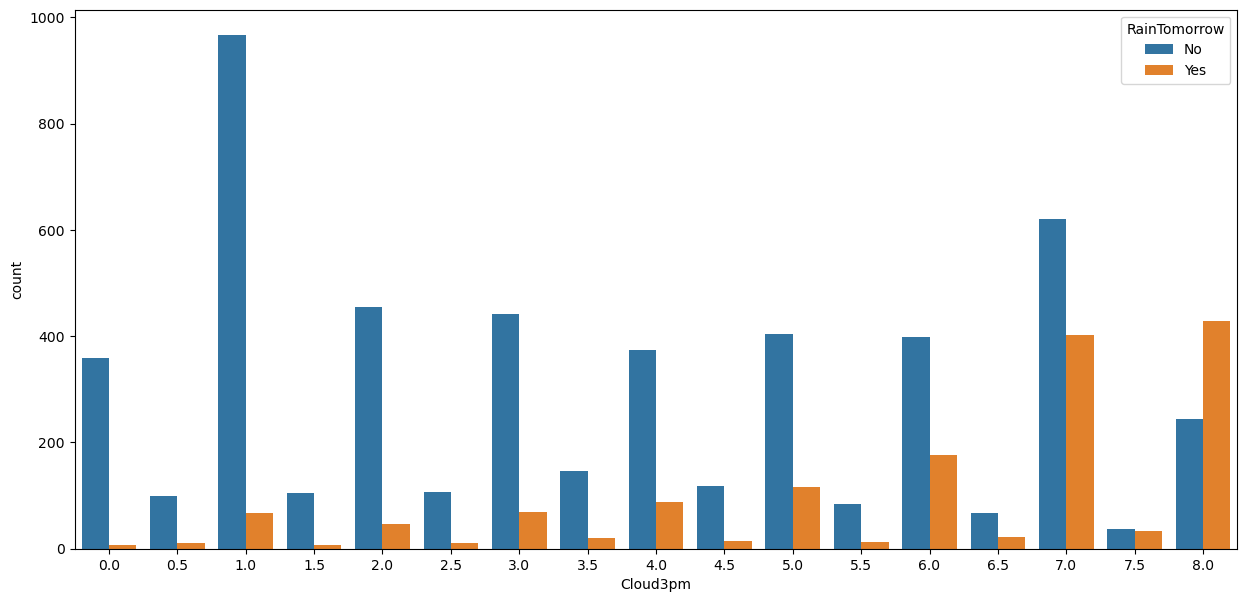

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud3pm",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud3pm', ylabel='count'>

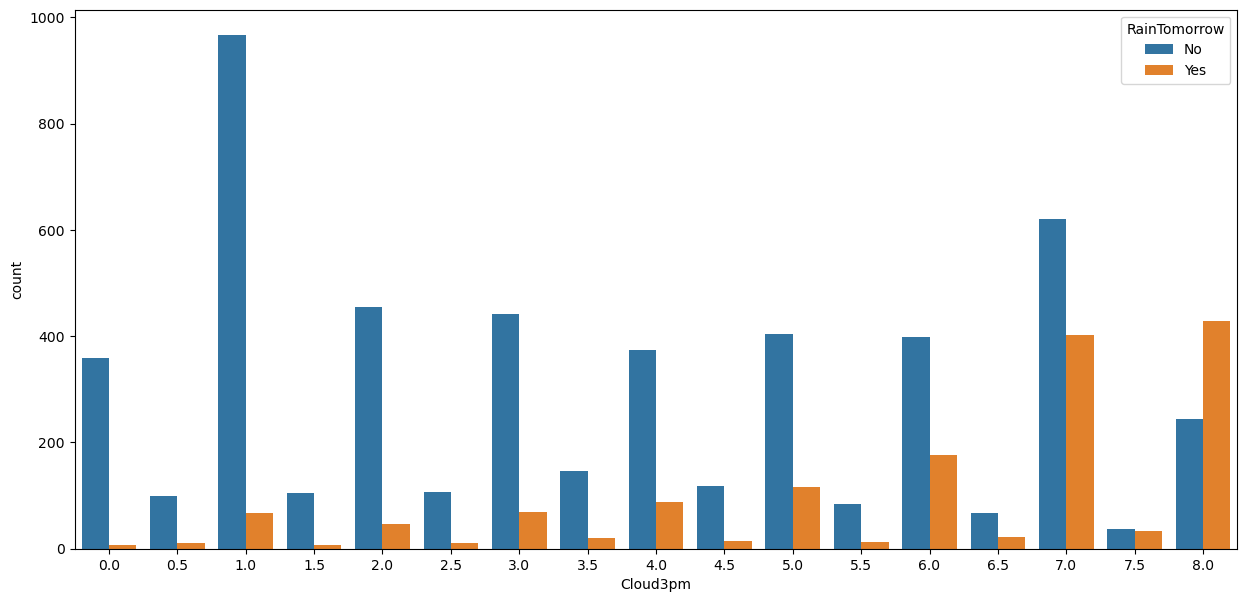

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud3pm",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud9am', ylabel='count'>

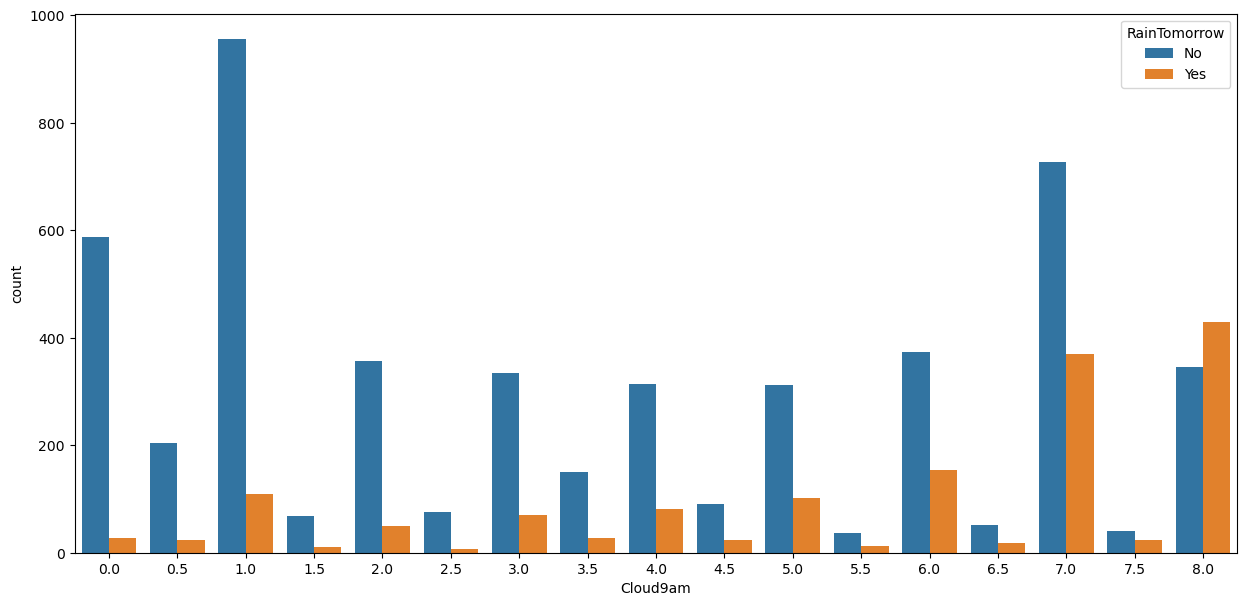

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud9am",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud9am', ylabel='count'>

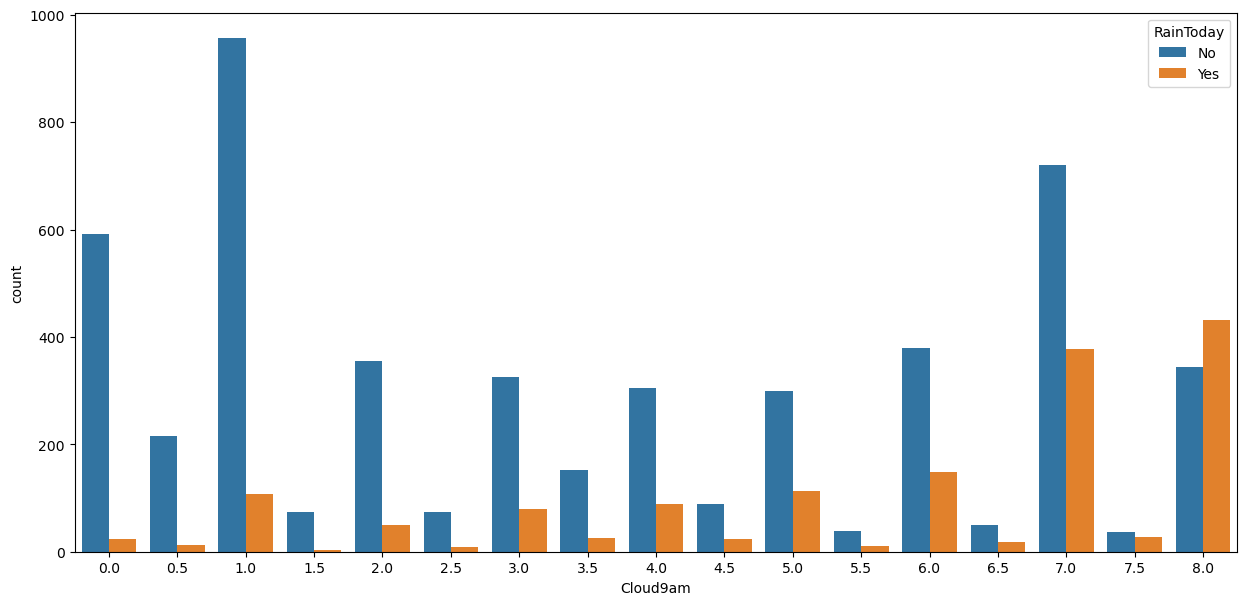

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud9am",hue='RainToday',data=df)

<Axes: xlabel='Location', ylabel='count'>

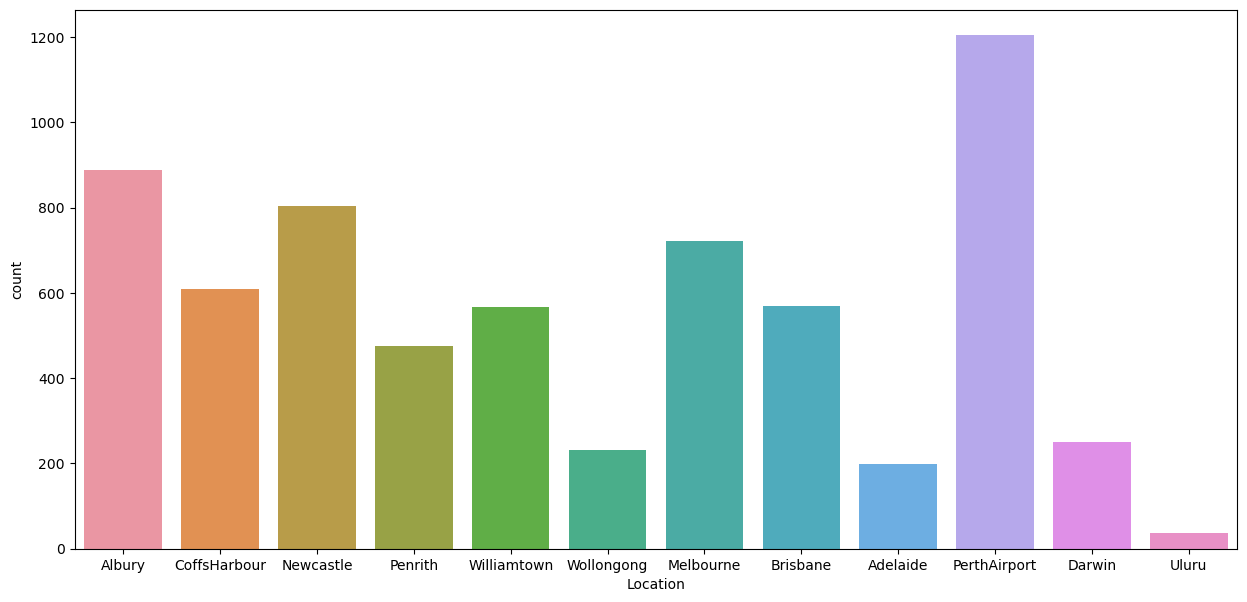

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x='Location',data=df)

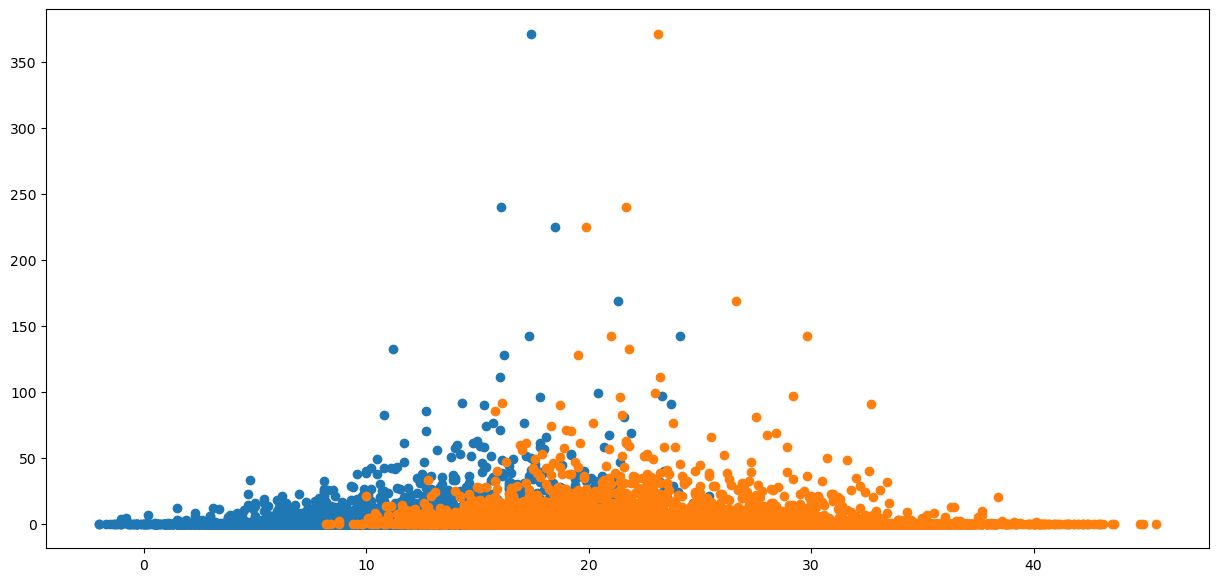

In [38]:
plt.figure(figsize=(15,7))
plt.scatter(df.MinTemp , df.Rainfall)
plt.scatter(df.MaxTemp , df.Rainfall)
plt.show()

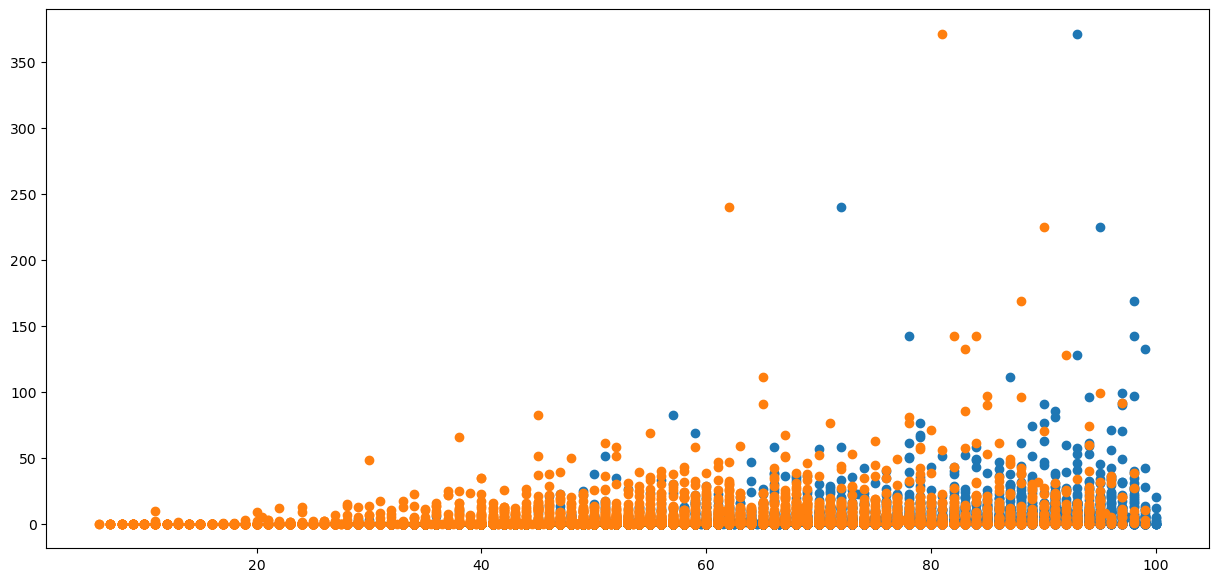

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(df.Humidity9am , df.Rainfall)
plt.scatter(df.Humidity3pm , df.Rainfall)
plt.show()

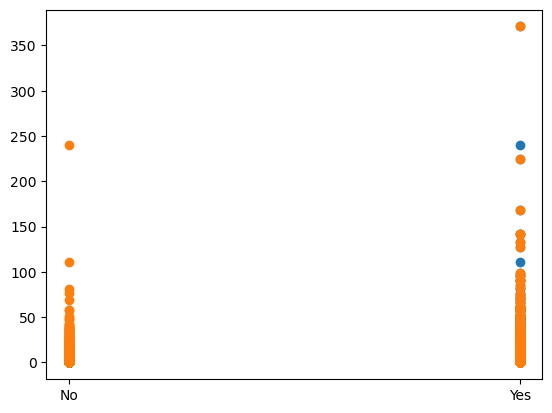

In [40]:
plt.scatter(df.RainToday , df.Rainfall)
plt.scatter(df.RainTomorrow , df.Rainfall)
plt.show()

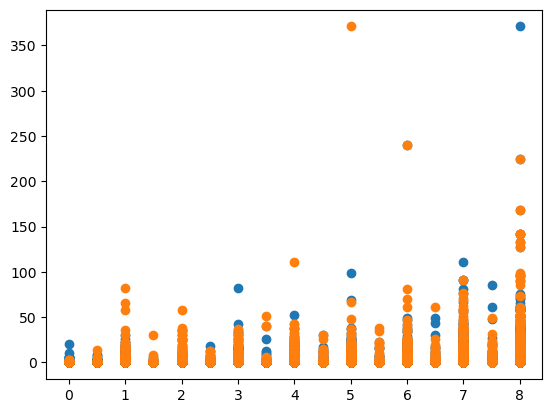

In [41]:
plt.scatter(df.Cloud9am , df.Rainfall)
plt.scatter(df.Cloud3pm , df.Rainfall)
plt.show()

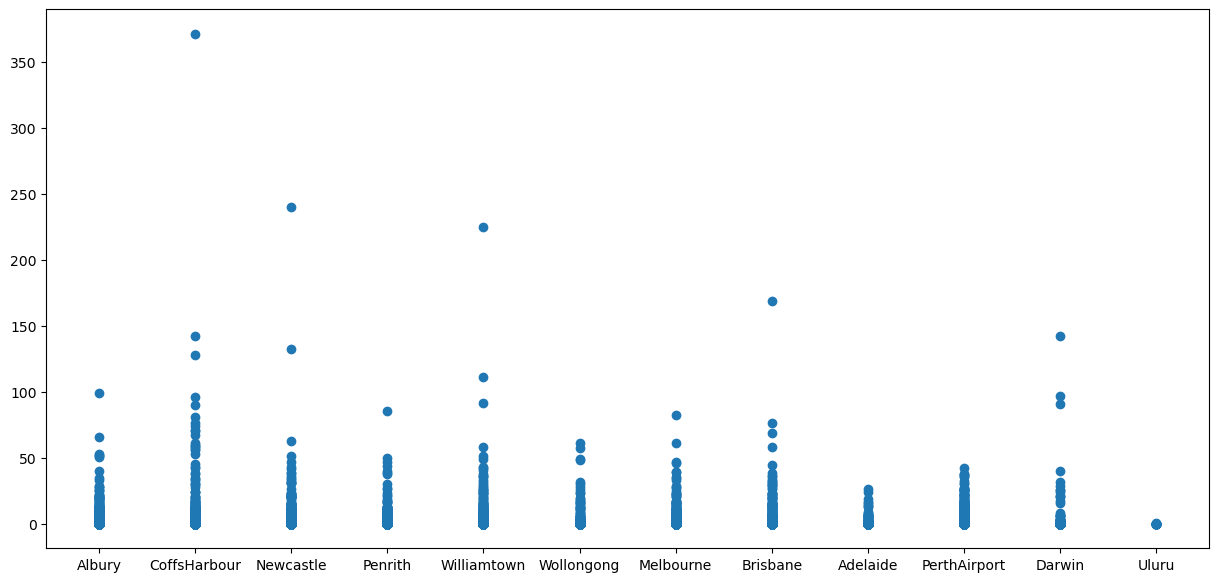

In [42]:
plt.figure(figsize=(15,7))
plt.scatter(df.Location , df.Rainfall)
plt.show()

<Axes: xlabel='month', ylabel='Rainfall'>

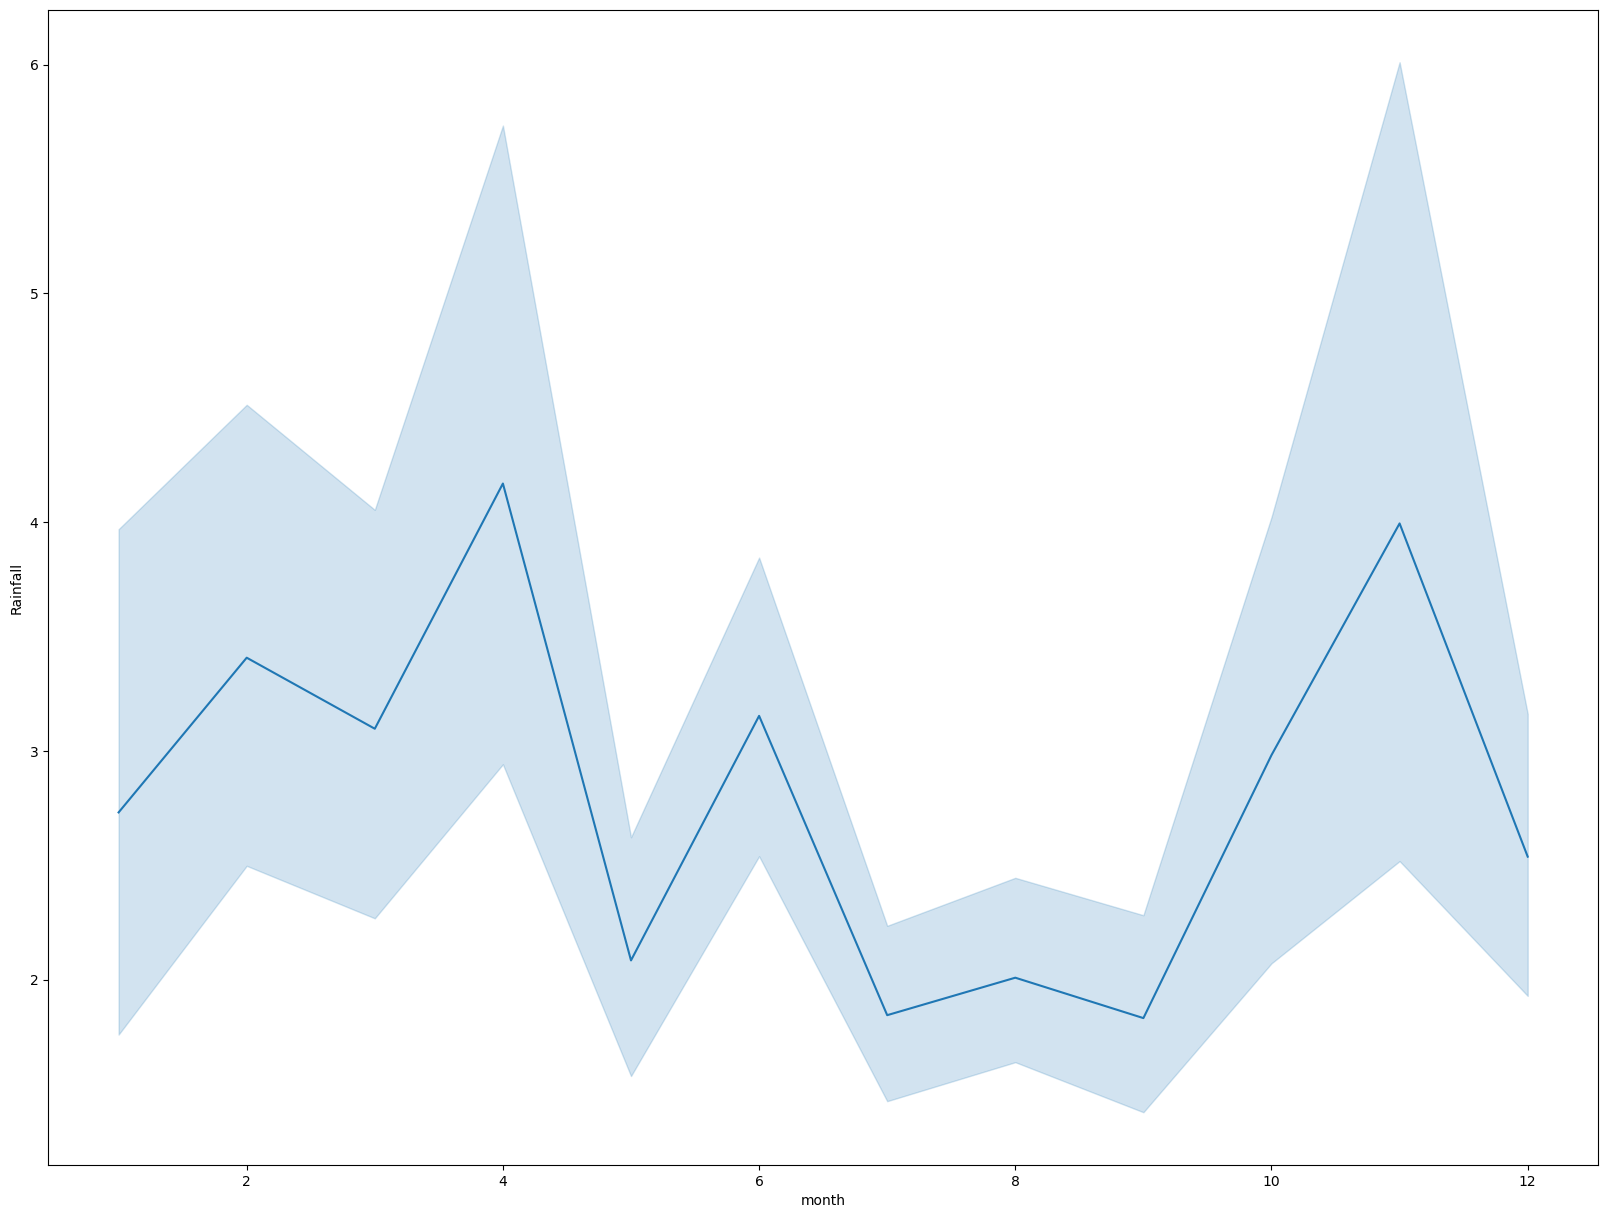

In [43]:
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='Rainfall',data=df)

<Axes: xlabel='year', ylabel='Rainfall'>

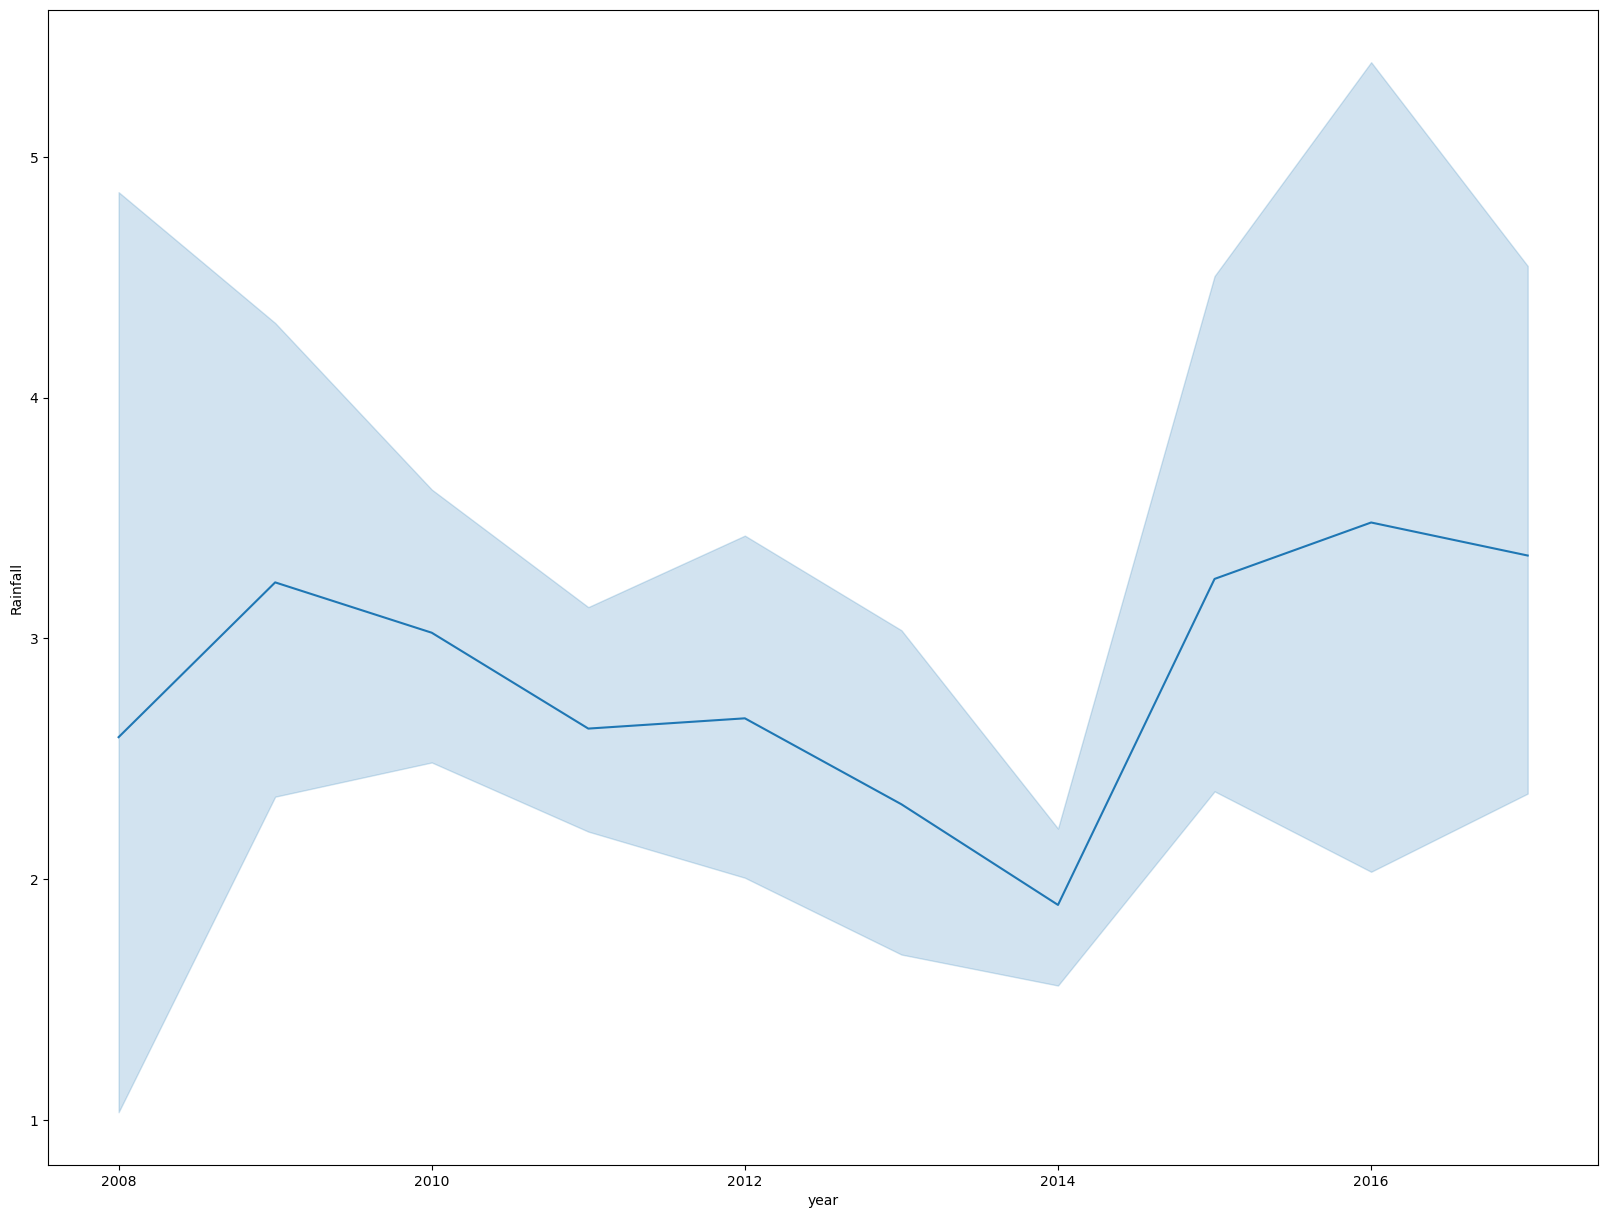

In [44]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year',y='Rainfall',data=df)

In [45]:
sns.set(font_scale=3)

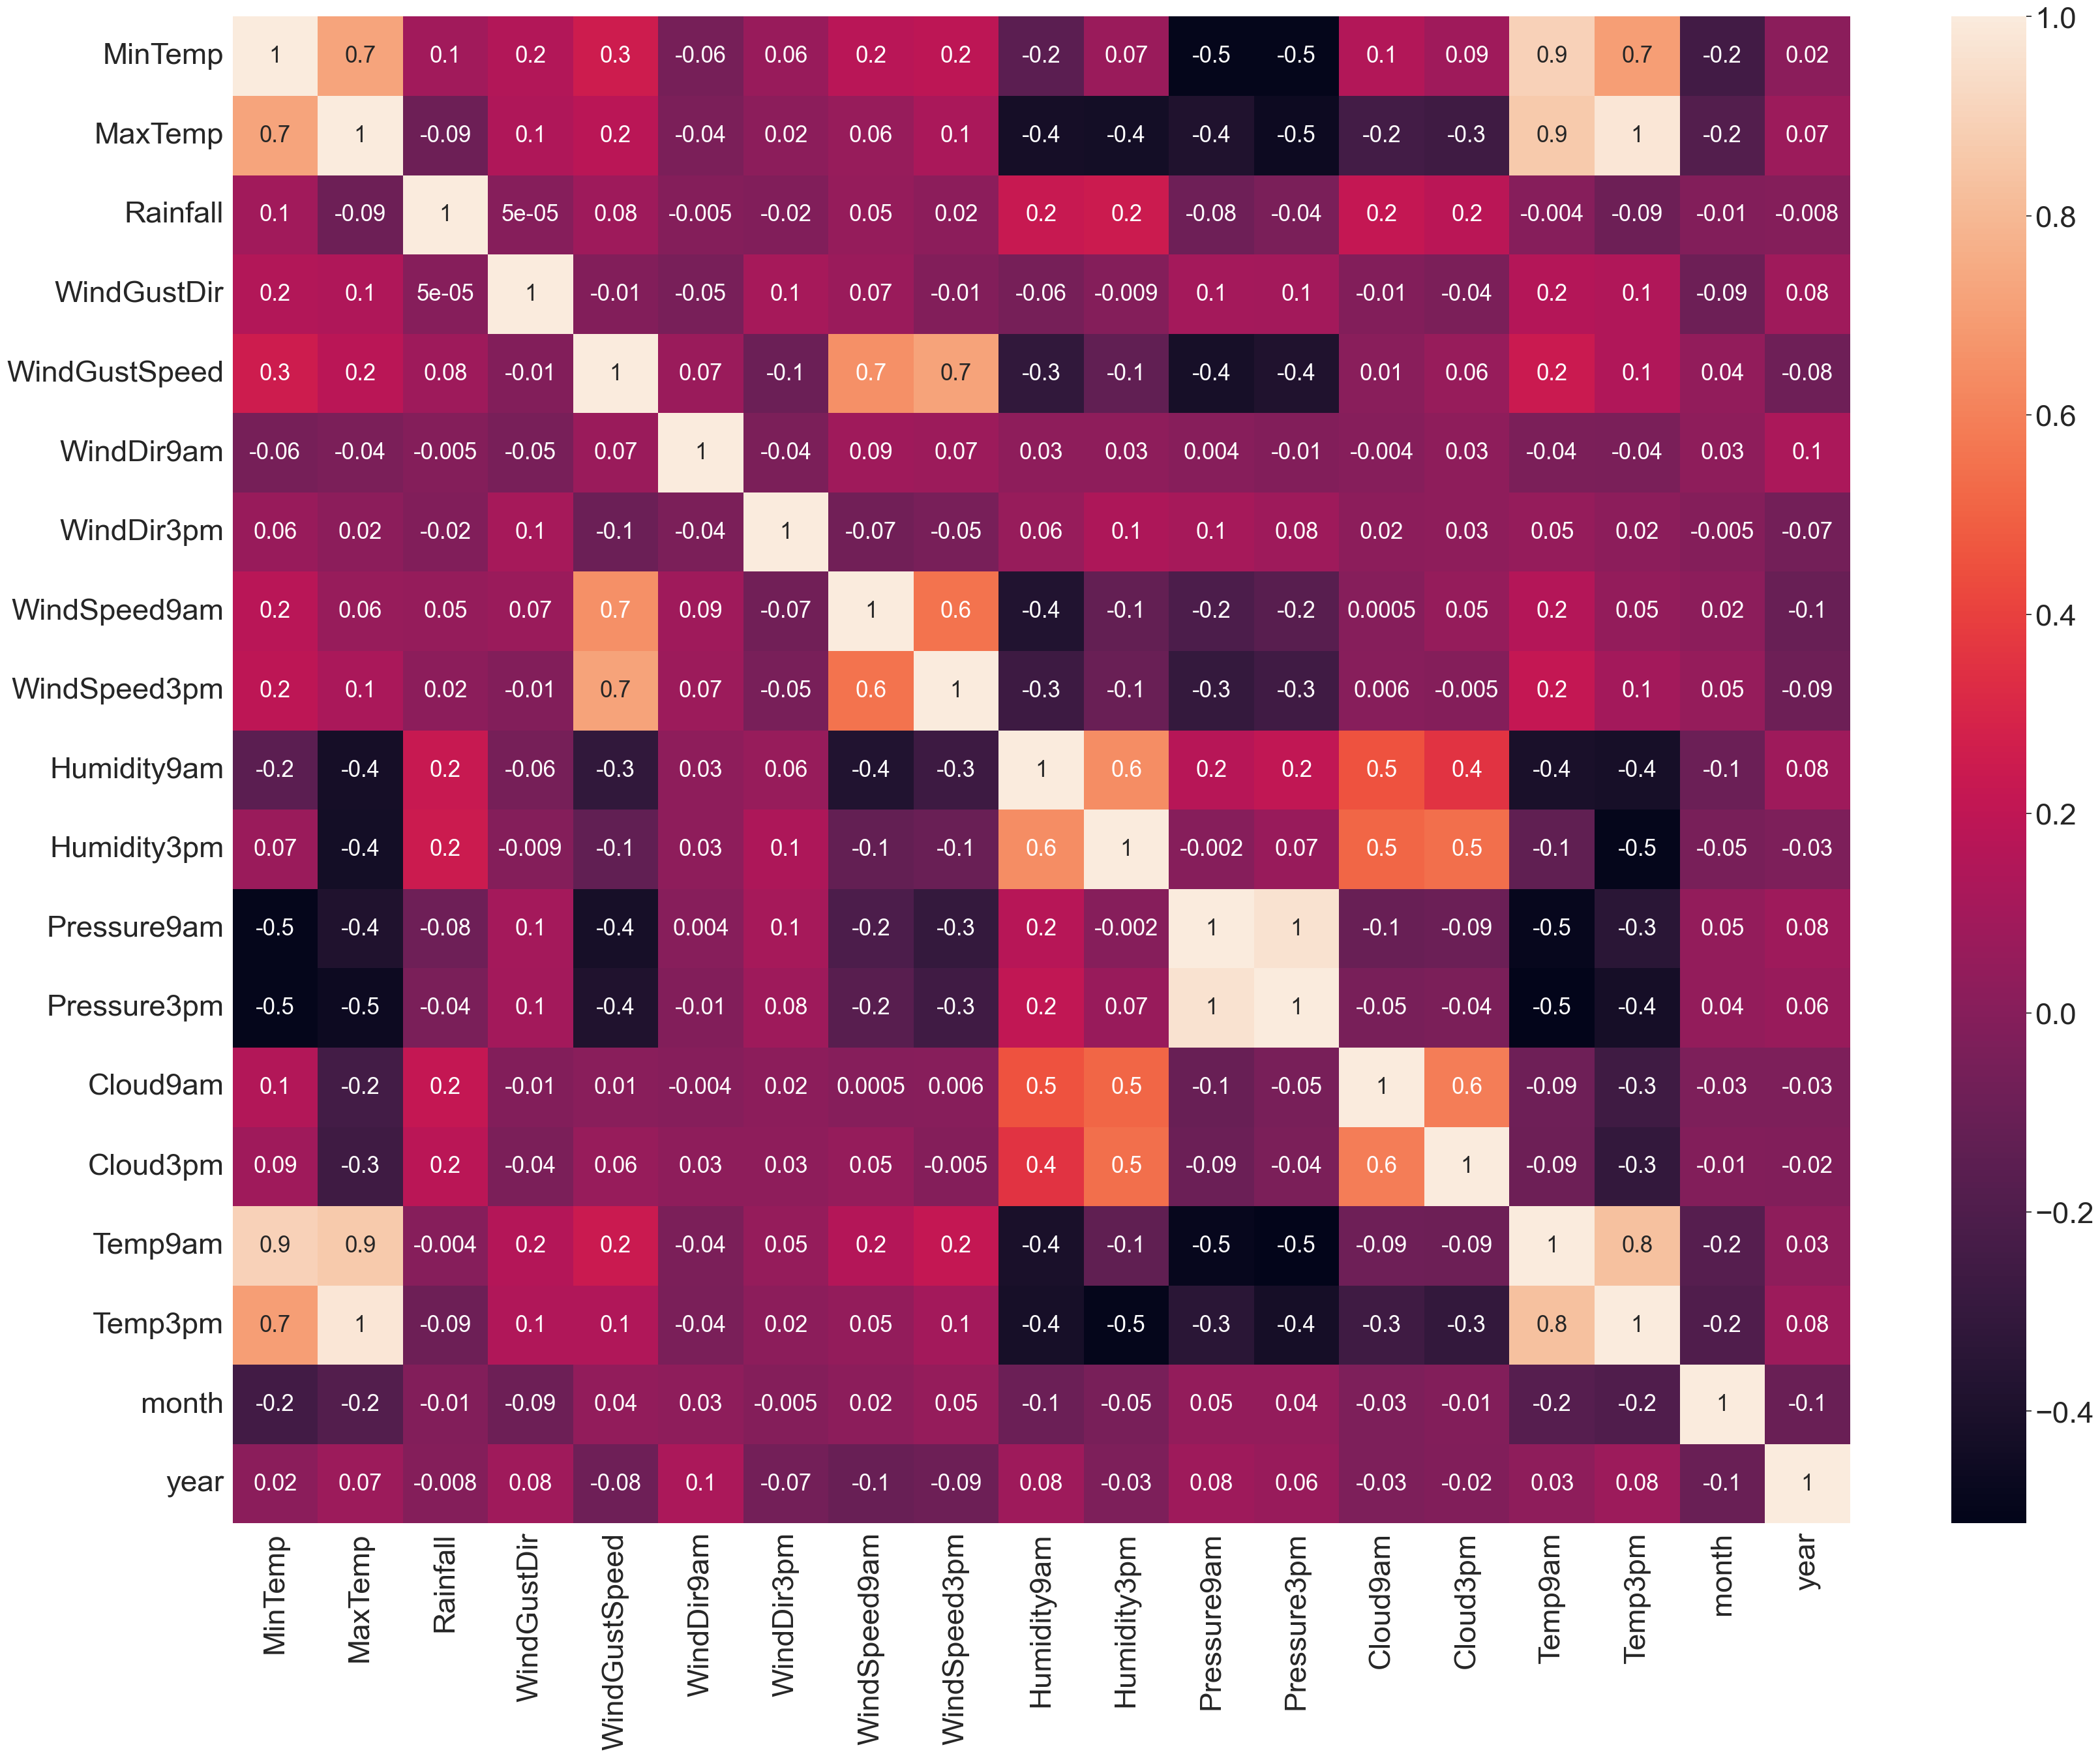

In [46]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':25})
sns.set(font_scale=3)

In [47]:
df.Location = pd.factorize(df.Location)[0]
df.RainToday = pd.factorize(df.RainToday)[0]
df.RainTomorrow = pd.factorize(df.RainTomorrow)[0]

In [48]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0            0     13.4     22.9       0.6          0.0           44.0   
1            0      7.4     25.1       0.0          1.0           44.0   
2            0     12.9     25.7       0.0          2.0           46.0   
3            0      9.2     28.0       0.0          3.0           24.0   
4            0     17.5     32.3       1.0          0.0           41.0   
...        ...      ...      ...       ...          ...            ...   
8419        11      3.5     21.8       0.0         15.0           31.0   
8420        11      2.8     23.4       0.0         15.0           31.0   
8421        11      3.6     25.3       0.0          4.0           22.0   
8422        11      5.4     26.9       0.0          5.0           37.0   
8423        11      7.8     27.0       0.0         13.0           28.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Pressure9am  \
0            0.0         0.0          20.0          24.0  ...       1007.7   
1            1.0         1.0           4.0          22.0  ...       1010.6   
2            0.0         1.0          19.0          26.0  ...       1007.6   
3            2.0         2.0          11.0           9.0  ...       1017.6   
4            3.0         3.0           7.0          20.0  ...       1010.8   
...          ...         ...           ...           ...  ...          ...   
8419        12.0         2.0          15.0          13.0  ...       1024.7   
8420         2.0         7.0          13.0          11.0  ...       1024.6   
8421         2.0        12.0          13.0           9.0  ...       1023.5   
8422         2.0         0.0           9.0           9.0  ...       1021.0   
8423         5.0        12.0          13.0           7.0  ...       1019.4   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0          1007.1       8.0       5.5     16.9     21.8          0   
1          1007.8       0.5       0.5     17.2     24.3          0   
2          1008.7       1.0       2.0     21.0     23.2          0   
3          1012.8       1.0       0.5     18.1     26.5          0   
4          1006.0       7.0       8.0     17.8     29.7          0   
...           ...       ...       ...      ...      ...        ...   
8419       1021.2       0.5       4.0      9.4     20.9          0   
8420       1020.3       2.0       0.5     10.1     22.4          0   
8421       1019.1       2.0       1.0     10.9     24.5          0   
8422       1016.8       4.0       3.5     12.5     26.1          0   
8423       1016.5       3.0       2.0     15.1     26.0          0   

      RainTomorrow  month  year  
0                0     12  2008  
1                0     12  2008  
2                0     12  2008  
3                0     12  2008  
4                0     12  2008  
...            ...    ...   ...  
8419             0      6  2017  
8420             0      6  2017  
8421             0      6  2017  
8422             0      6  2017  
8423             0      6  2017  

[6558 rows x 22 columns]

.

.

.

In [49]:
# maxTemp = Temp3pm
# Temp3pm = Temp9am
# Pressure3pm = Pressure9am
# Temp3pm is highly correlate with maxTemp and temp9am
# temp9am is highly correlate with minTemp , maxTemp and Temp3pm

In [50]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'month', 'year'],
      dtype='object')

In [51]:
# Deleting those who contribute the least to the target and are highly related
# month and year is only creating noise and not contributing to the target
df=df.drop(['Temp3pm','Temp9am','Pressure3pm','month','year','WindGustDir','WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm',],axis=1)

In [52]:
sns.set(font_scale=1)

In [53]:
sns.set(font_scale=3)

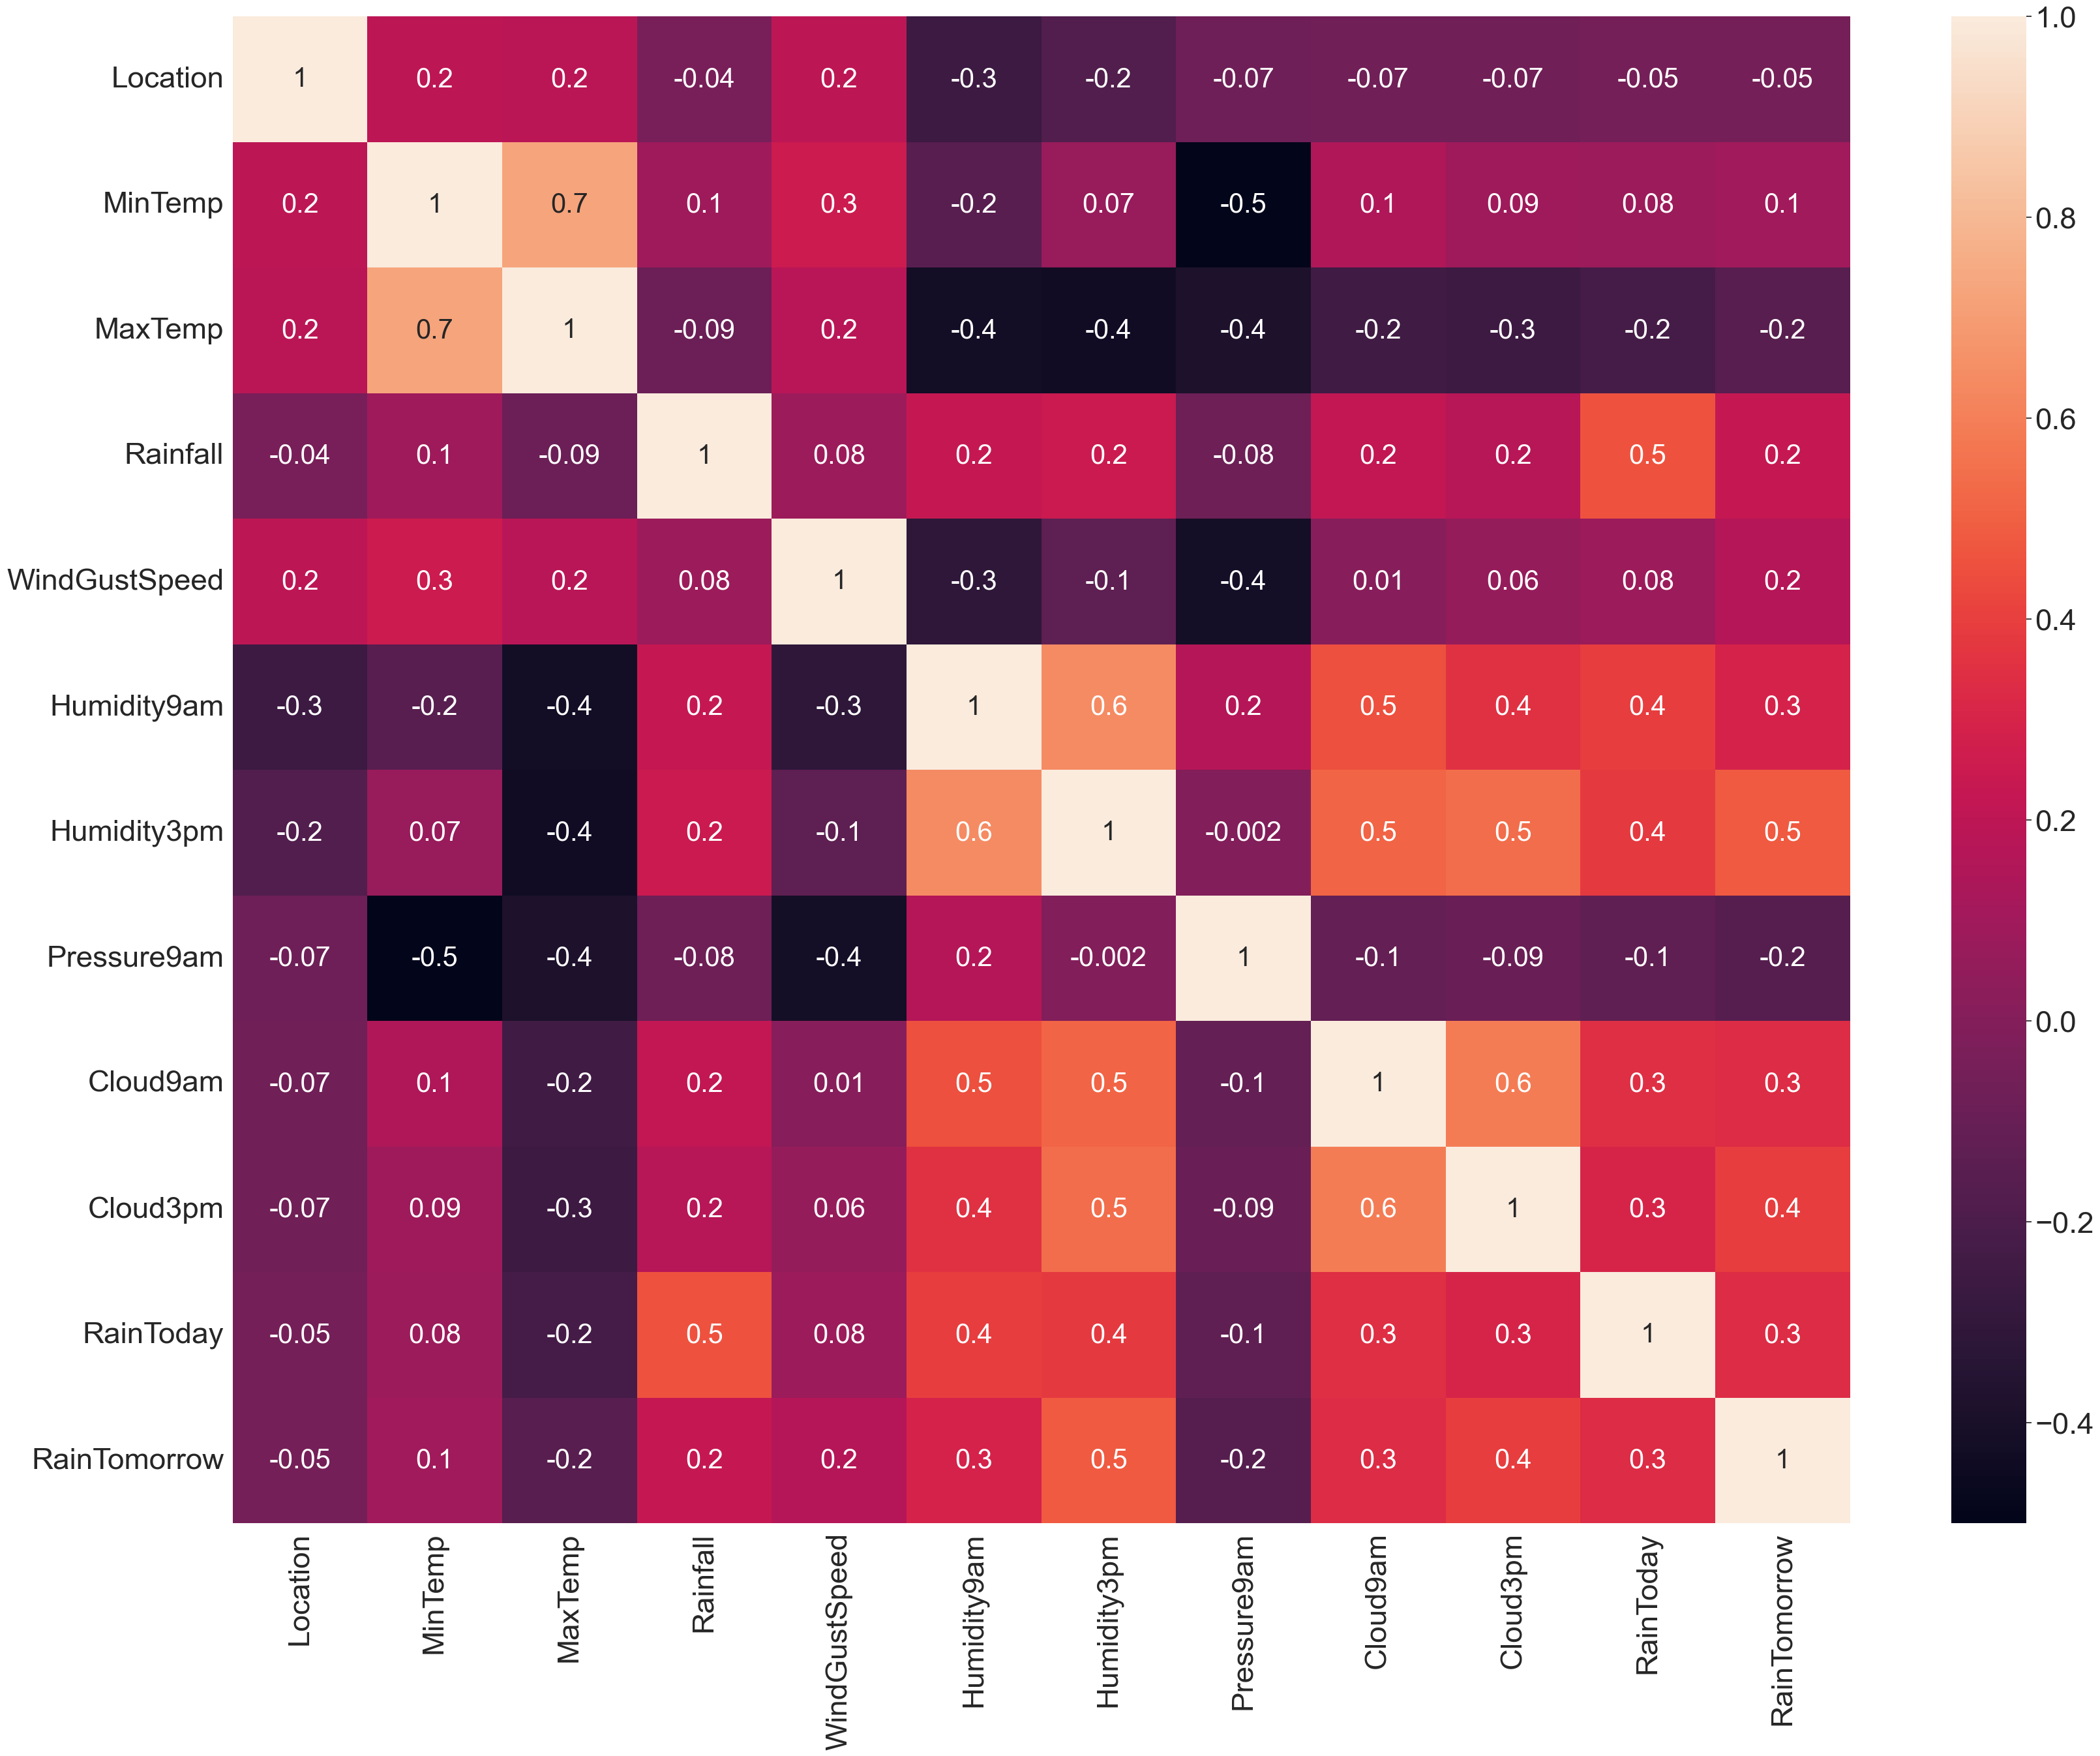

In [54]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=3)

In [55]:
df.skew()

Location          0.082046
MinTemp          -0.064667
MaxTemp           0.329542
Rainfall         13.584687
WindGustSpeed     0.739214
Humidity9am      -0.247029
Humidity3pm       0.154585
Pressure9am      -0.035552
Cloud9am         -0.017392
Cloud3pm         -0.040852
RainToday         1.238461
RainTomorrow      1.256435
dtype: float64

Location
0.0820277280107107


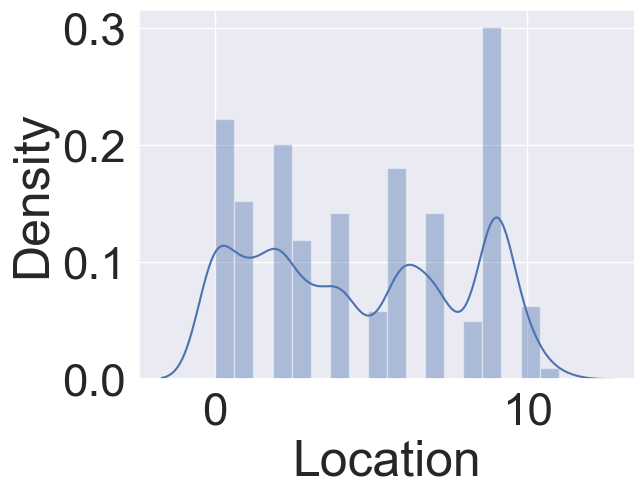

MinTemp
-0.06465210080295063


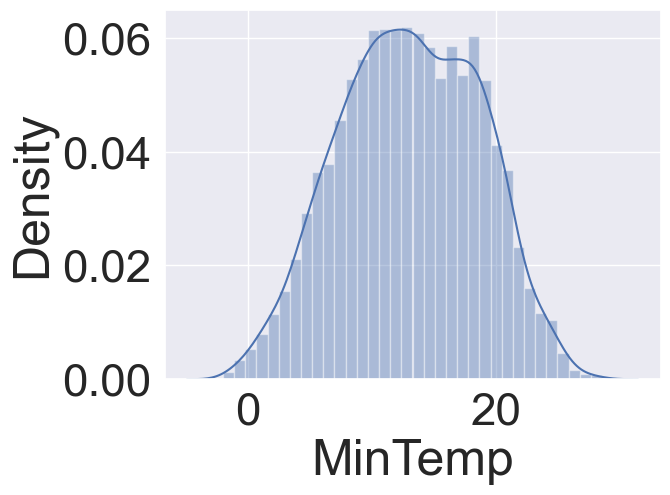

MaxTemp
0.32946695410364685


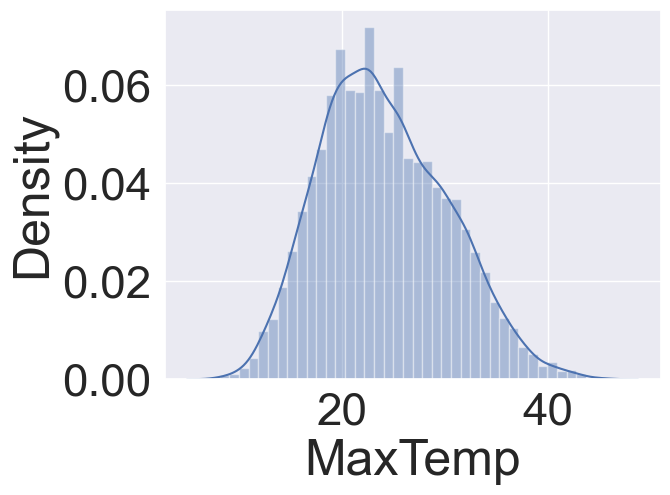

Rainfall
13.581579428692045


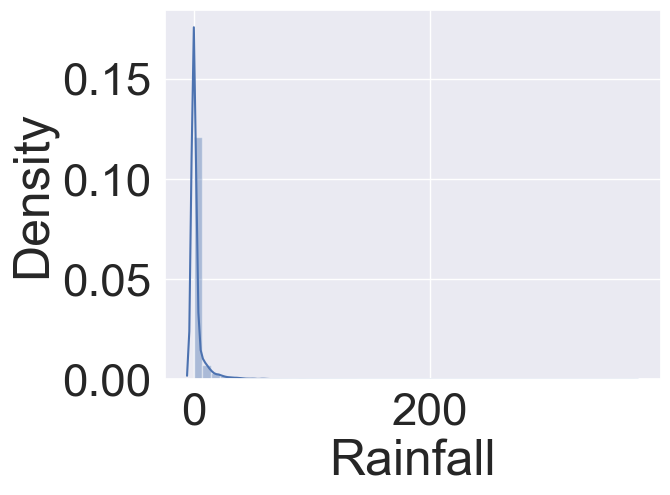

WindGustSpeed
0.7390448451027596


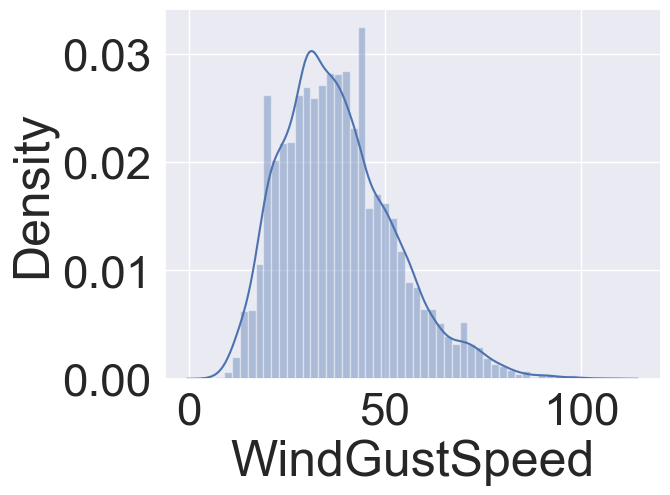

Humidity9am
-0.2469723479022833


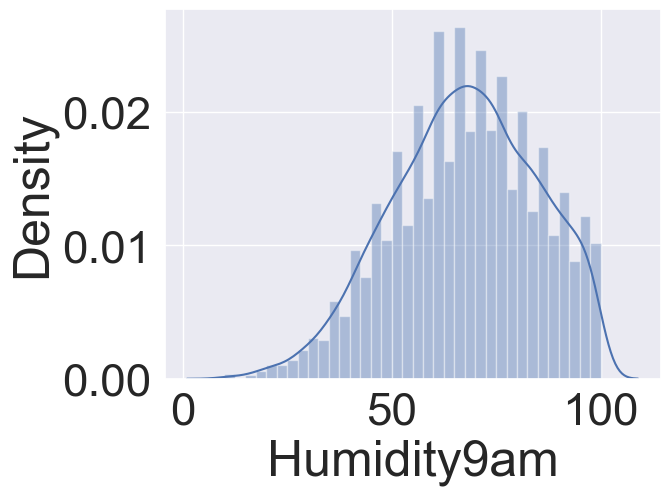

Humidity3pm
0.15455013444482332


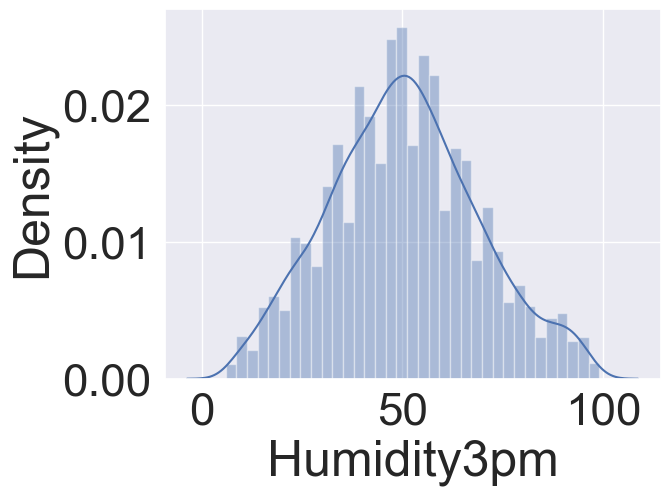

Pressure9am
-0.035544285815096464


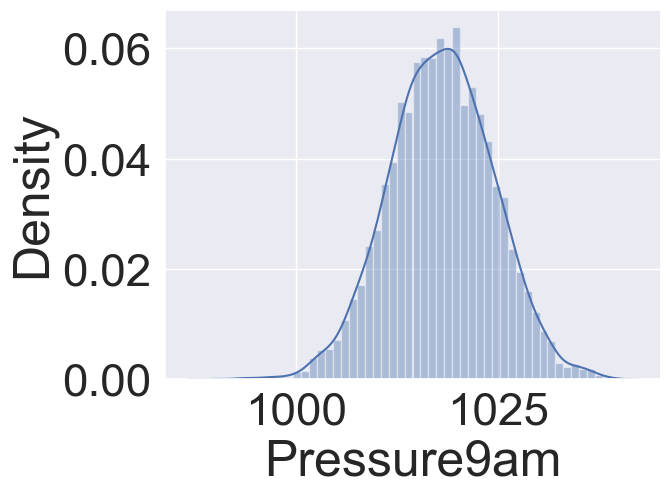

Cloud9am
-0.01738817291938893


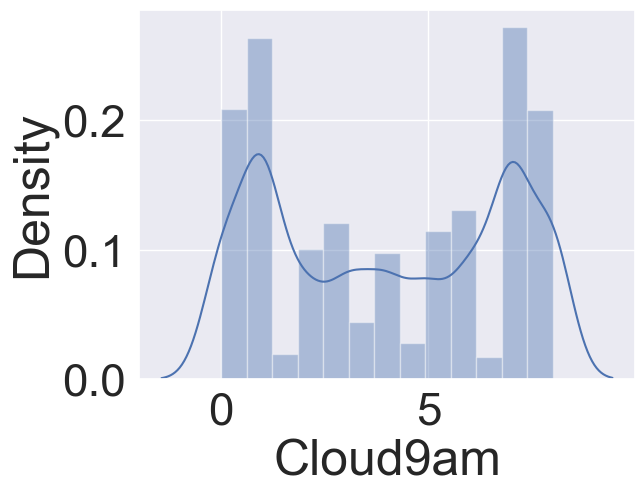

Cloud3pm
-0.04084242595619002


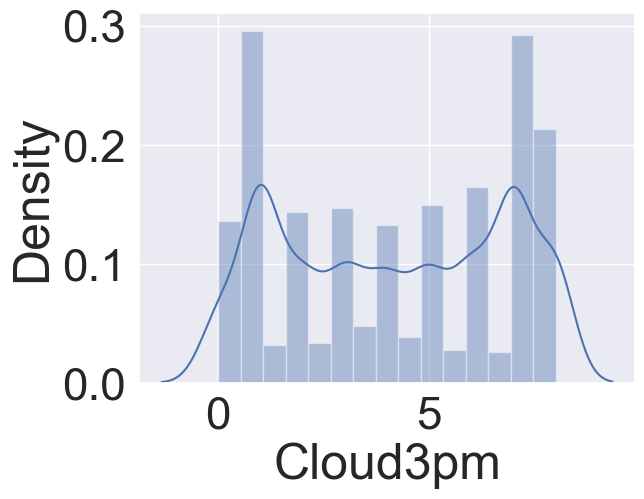

RainToday
1.2381778149376137


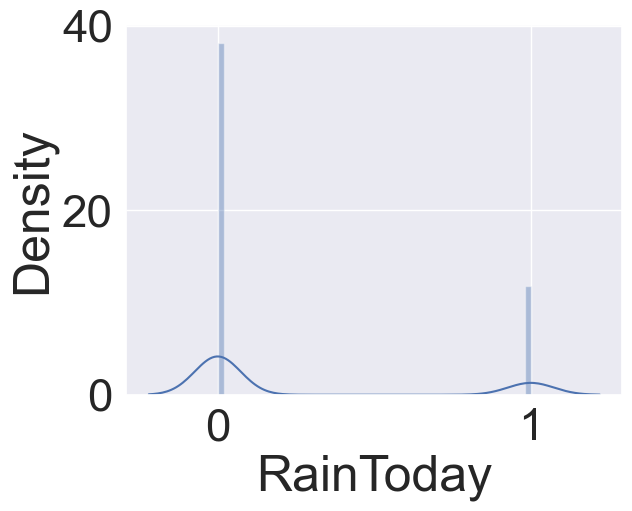

RainTomorrow
1.2561476704423478


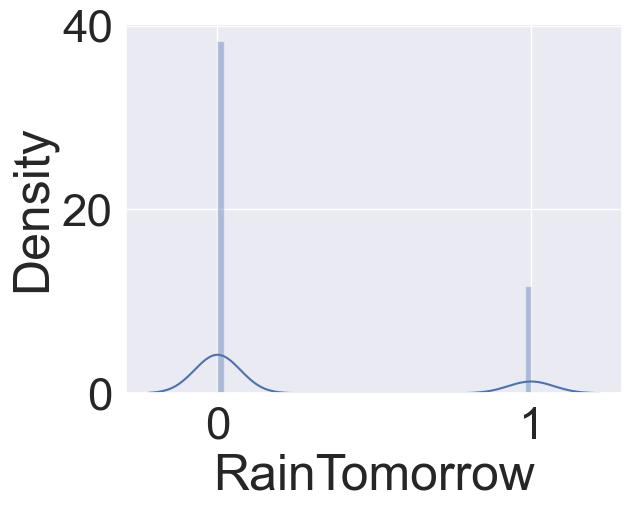

In [56]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [57]:
sns.set(font_scale=1)

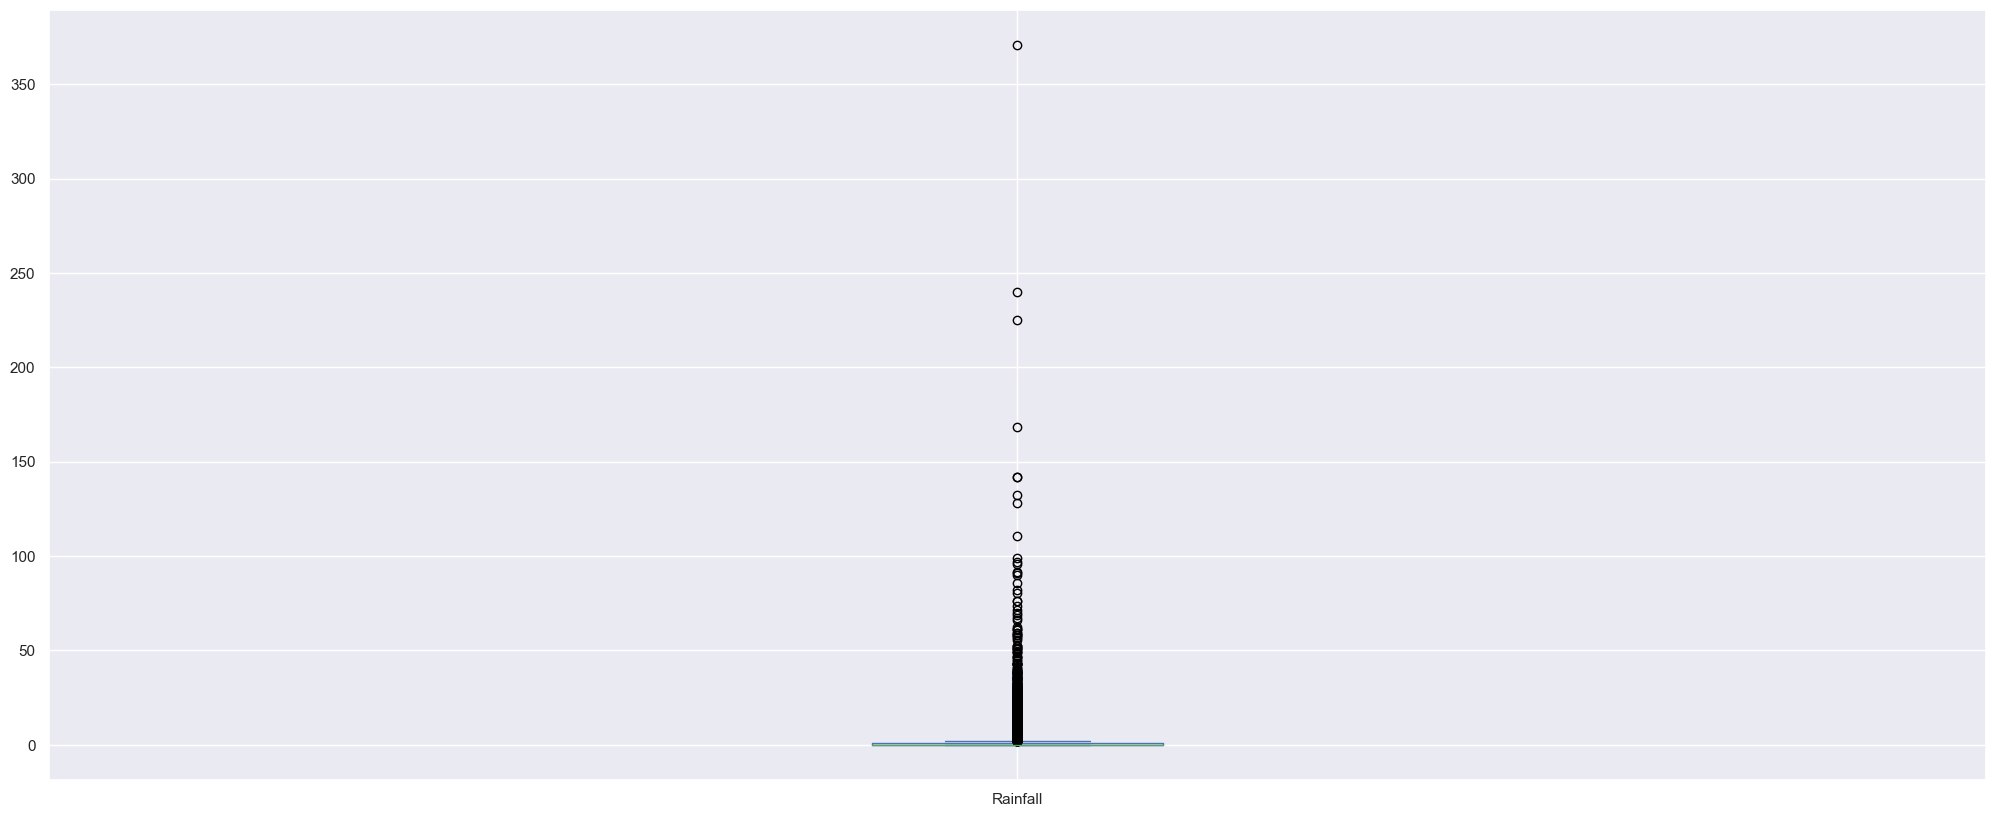

In [58]:
df.Rainfall.plot(kind='box',figsize=(25,10))
sns.set(font_scale=1)

In [59]:
# we should not remove the skewness of the column which has very good correlation with the target , in this case rainfall and rainfalltoday are more than 50% correlated.

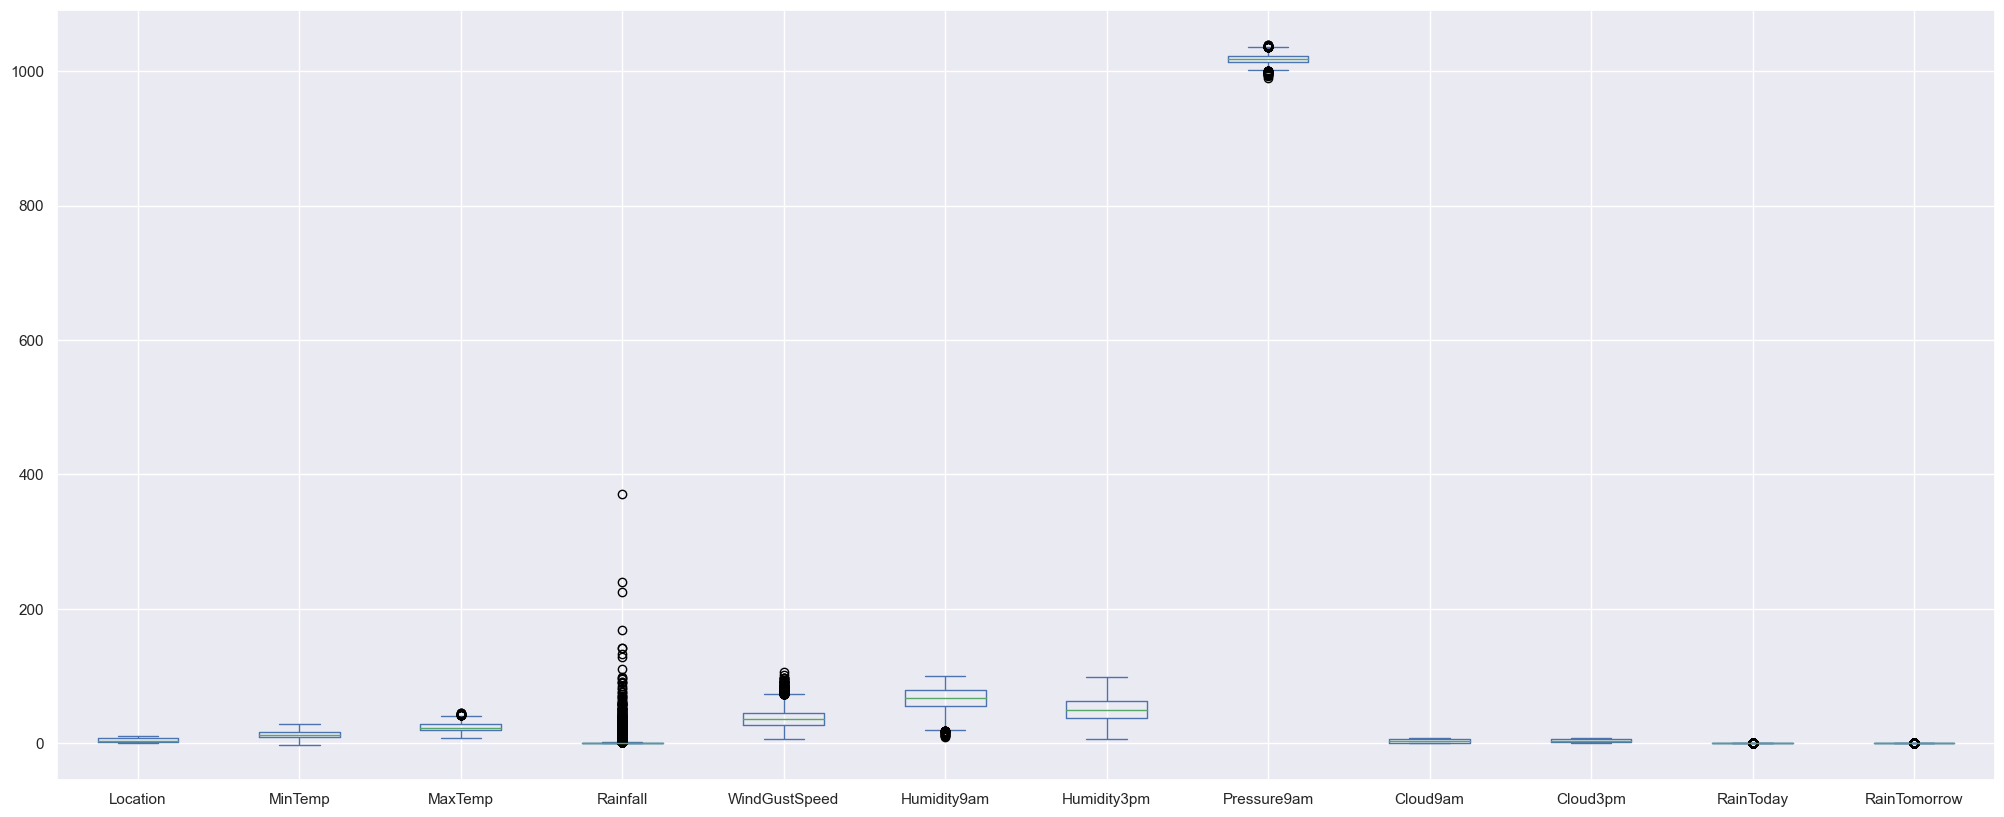

In [60]:
df.plot(kind='box',figsize=(25,10))
sns.set(font_scale=1)

In [61]:
df.describe()

Location      MinTemp      MaxTemp     Rainfall  WindGustSpeed  \
count  6558.000000  6558.000000  6558.000000  6558.000000    6558.000000   
mean      4.684965    13.047362    24.102402     2.771134      37.929094   
std       3.329478     5.586652     6.131267    10.599379      14.411071   
min       0.000000    -2.000000     8.200000     0.000000       7.000000   
25%       2.000000     8.900000    19.600000     0.000000      28.000000   
50%       4.000000    13.100000    23.500000     0.000000      36.000000   
75%       8.000000    17.400000    28.400000     0.800000      46.000000   
max      11.000000    28.500000    45.500000   371.000000     107.000000   

       Humidity9am  Humidity3pm  Pressure9am     Cloud9am     Cloud3pm  \
count  6558.000000  6558.000000  6558.000000  6558.000000  6558.000000   
mean     67.442742    50.445715  1017.973315     4.048033     4.169716   
std      17.254689    18.601172     6.449860     2.791667     2.598600   
min      10.000000     6.000000   989.800000     0.000000     0.000000   
25%      56.000000    38.000000  1013.650000     1.000000     2.000000   
50%      68.000000    50.000000  1018.000000     4.000000     4.000000   
75%      80.000000    63.000000  1022.350000     7.000000     7.000000   
max     100.000000    99.000000  1039.000000     8.000000     8.000000   

         RainToday  RainTomorrow  
count  6558.000000   6558.000000  
mean      0.236810      0.234065  
std       0.425157      0.423445  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       1.000000      1.000000

In [62]:
# skewness of Rainfall is very high and no data is below 75% as shown in above cell 

<Axes: ylabel='RainToday'>

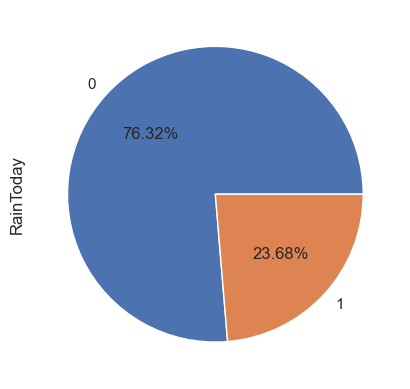

In [63]:
df.RainToday.value_counts().plot.pie(autopct='%.2f%%')

<Axes: ylabel='RainTomorrow'>

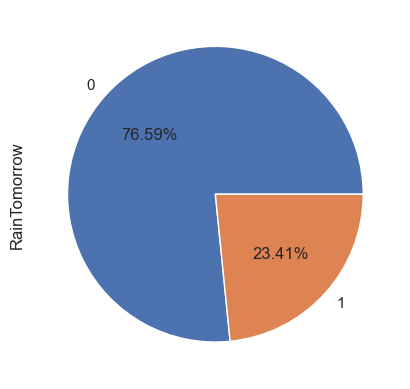

In [64]:
df.RainTomorrow.value_counts().plot.pie(autopct='%.2f%%')

In [65]:
x=df.drop(['RainToday','RainTomorrow'],axis=1)
y=df.RainToday

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

<Axes: ylabel='RainToday'>

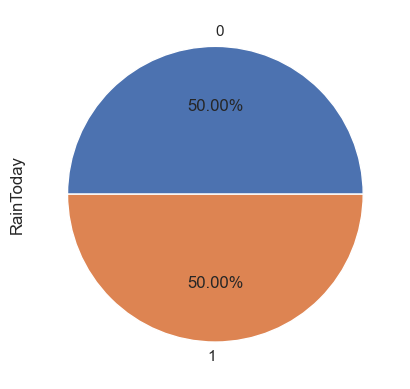

In [67]:
y1.value_counts().plot.pie(autopct='%.2f%%')

.

.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [70]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.9837305551591266
Testint :  0.9823509823509824
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1534
           1       1.00      0.97      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.99695122 0.99161585 0.99466463 0.99313501 0.98398169]
0.992069682424513
difference -0.009718700073530595


In [71]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.9159412016554874
Testint :  0.8651348651348651
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1534
           1       0.83      0.91      0.87      1469

    accuracy                           0.87      3003
   macro avg       0.87      0.87      0.87      3003
weighted avg       0.87      0.87      0.86      3003

[0.88871951 0.89329268 0.86890244 0.87490465 0.88100686]
0.8813652304143179
difference -0.016230365279452763


In [72]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.9747395461681176
Testint :  0.977022977022977
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1534
           1       0.96      1.00      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.97484756 0.96189024 0.96417683 0.98627002 0.98093059]
0.9736230488735093
difference 0.003399928149467768


In [73]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [74]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
difference 0.0
[[1534    0]
 [   0 1469]]


In [75]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [76]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [77]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [78]:
# All models are performing best

.

.

.

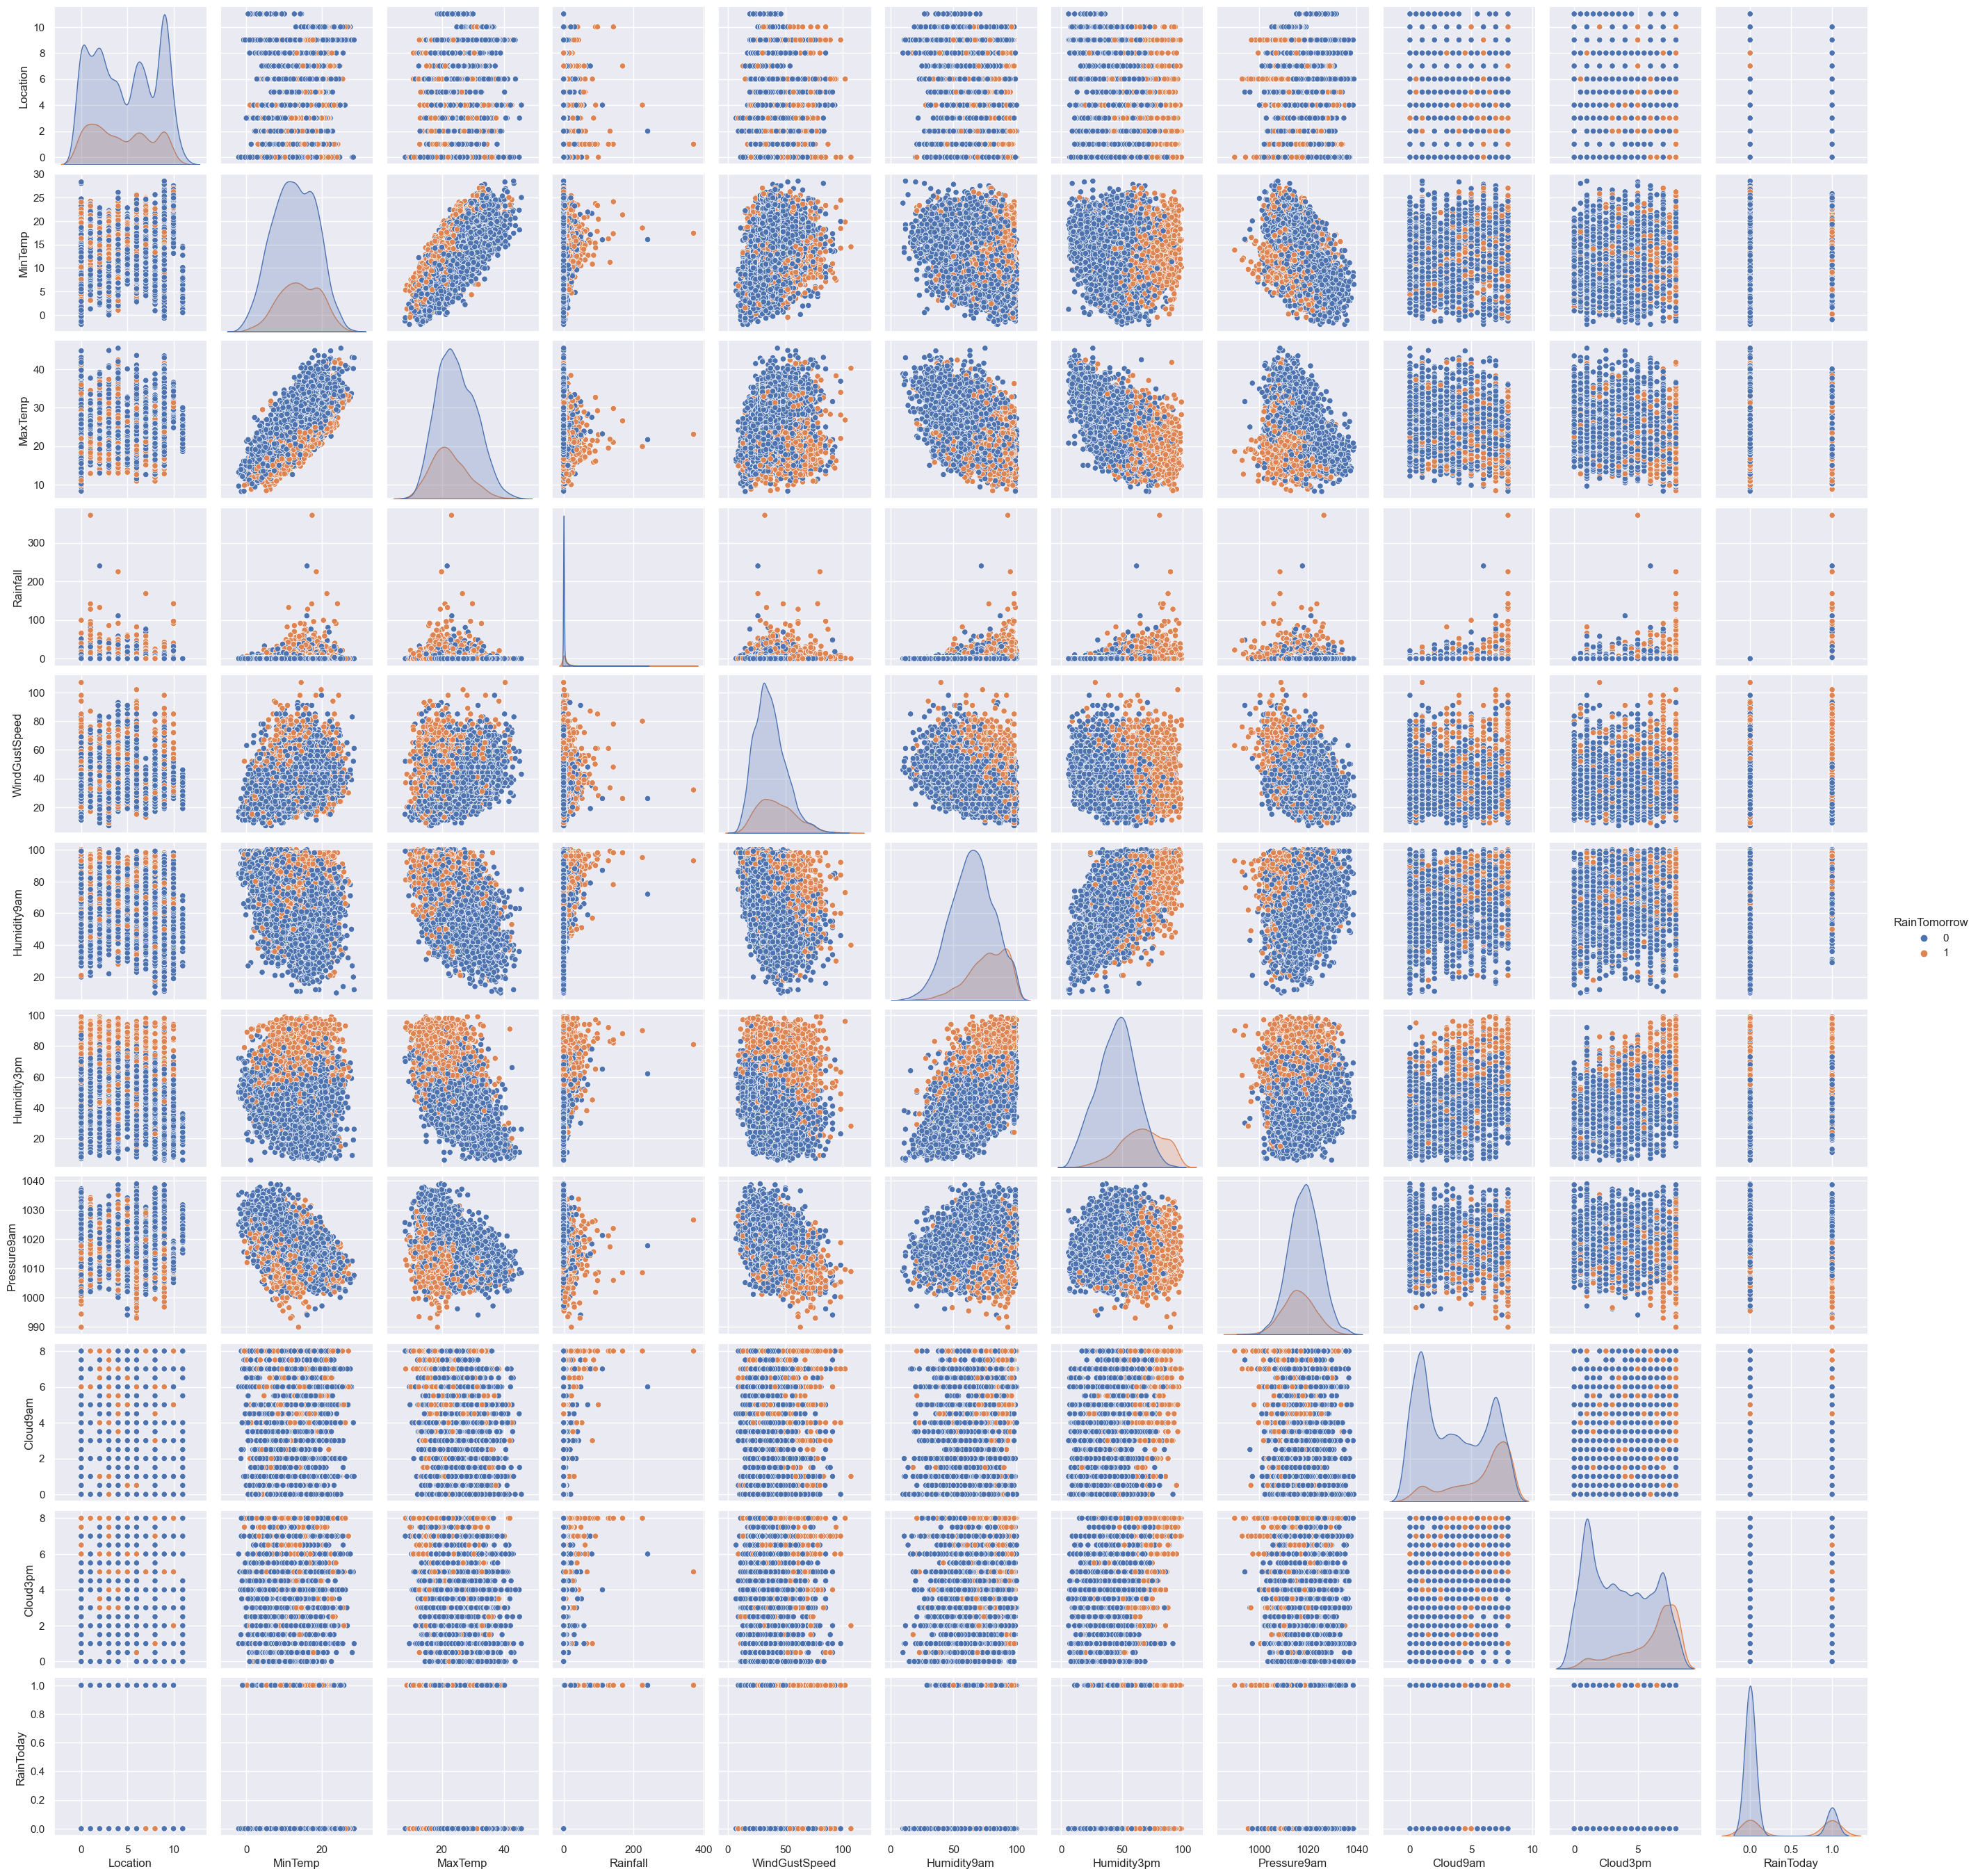

In [79]:
sns.pairplot(data=df,hue='RainTomorrow')
sns.set(font_scale=1)

In [80]:
x3=df.drop(['RainToday','RainTomorrow'],axis=1)
y3=df.RainTomorrow

In [81]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x4,y4 = sm.fit_resample(x3,y3)

<Axes: ylabel='RainTomorrow'>

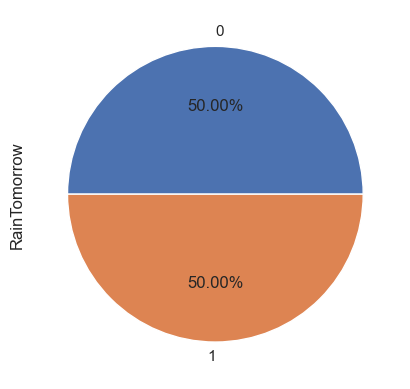

In [82]:
y4.value_counts().plot.pie(autopct='%.2f%%')

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [84]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.9837305551591266
Testint :  0.9823509823509824
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1534
           1       1.00      0.97      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.99695122 0.99161585 0.99466463 0.99313501 0.98398169]
0.992069682424513
difference -0.009718700073530595


In [85]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.9747395461681176
Testint :  0.977022977022977
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1534
           1       0.96      1.00      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.97484756 0.96189024 0.96417683 0.98627002 0.98093059]
0.9736230488735093
difference 0.003399928149467768


In [86]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.9159412016554874
Testint :  0.8651348651348651
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1534
           1       0.83      0.91      0.87      1469

    accuracy                           0.87      3003
   macro avg       0.87      0.87      0.87      3003
weighted avg       0.87      0.87      0.86      3003

[0.88871951 0.89329268 0.86890244 0.87490465 0.88100686]
0.8813652304143179
difference -0.016230365279452763


In [87]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [88]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
difference 0.0
[[1534    0]
 [   0 1469]]


In [89]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [90]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [91]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


.

.

.

# Every model is performing great but we will choose "LogisticRegression"

In [92]:
import joblib
joblib.dump(lr,'weatherAUS.obj')

['weatherAUS.obj']